Soluciones para Módulo 2: Programación Funcional y Orientada a Objetos en Python

Ejercicio 1: Funciones con Parámetros por Defecto y Nombrados

In [1]:
def calcular_precio_final(precio_base, impuesto=0.21, descuento=0):
    """
    Calcula el precio final de un producto después de aplicar descuento e impuesto.

    Args:
        precio_base (float): Precio original del producto
        impuesto (float): Porcentaje de impuesto (por defecto 0.21 o 21%)
        descuento (float): Porcentaje de descuento (por defecto 0 o sin descuento)

    Returns:
        float: Precio final calculado
    """
    # Primero aplicamos el descuento
    precio_con_descuento = precio_base * (1 - descuento)

    # Luego aplicamos el impuesto
    precio_final = precio_con_descuento * (1 + impuesto)

    return precio_final

# Pruebas
print(calcular_precio_final(100))  # 121.0 (sin descuento, 21% de impuesto)
print(calcular_precio_final(100, descuento=0.1))  # 108.9 (10% descuento, luego 21% impuesto)
print(calcular_precio_final(100, 0.05, 0.2))  # 84.0 (20% descuento, luego 5% impuesto)

121.0
108.89999999999999
84.0


Explicación:
Esta función utiliza parámetros con valores por defecto, una característica muy útil de Python. Si el usuario no proporciona valores para impuesto o descuento, se utilizan los valores predefinidos (0.21 para impuesto, 0 para descuento). La función calcula primero el precio con descuento, y luego aplica el impuesto sobre ese valor reducido, devolviendo el precio final.

Ejercicio 2: Funciones Lambda para Ordenamiento

In [2]:
# Lista de episodios: (número_episodio, pasos, recompensa_total)
episodios = [
    (1, 145, 24),
    (2, 97, 31),
    (3, 156, 18),
    (4, 82, 42),
    (5, 113, 37)
]

# Ordena los episodios por recompensa (mayor a menor)
episodios_por_recompensa = sorted(episodios, key=lambda x: x[2], reverse=True)

# Ordena los episodios por número de pasos (menor a mayor)
episodios_por_pasos = sorted(episodios, key=lambda x: x[1])

# Ordena los episodios por eficiencia (recompensa/pasos, mayor a menor)
episodios_por_eficiencia = sorted(episodios, key=lambda x: x[2]/x[1], reverse=True)

# Imprime los resultados
print("Por recompensa:", episodios_por_recompensa)
print("Por pasos:", episodios_por_pasos)
print("Por eficiencia:", episodios_por_eficiencia)

Por recompensa: [(4, 82, 42), (5, 113, 37), (2, 97, 31), (1, 145, 24), (3, 156, 18)]
Por pasos: [(4, 82, 42), (2, 97, 31), (5, 113, 37), (1, 145, 24), (3, 156, 18)]
Por eficiencia: [(4, 82, 42), (5, 113, 37), (2, 97, 31), (1, 145, 24), (3, 156, 18)]


Explicación:
Las funciones lambda (también conocidas como funciones anónimas) son pequeñas funciones definidas en una sola línea. Aquí las utilizamos como criterio de ordenación con la función sorted().

key=lambda x: x[2] permite ordenar según el tercer elemento de cada tupla (la recompensa total)
key=lambda x: x[1] permite ordenar según el segundo elemento (pasos)
key=lambda x: x[2]/x[1] calcula la eficiencia (recompensa/pasos) para cada episodio
El parámetro reverse=True invierte el orden, haciendo que sea de mayor a menor

Las funciones lambda son ideales para operaciones sencillas donde no vale la pena definir una función completa.

Ejercicio 3: Clase Básica para Agente de Aprendizaje por Refuerzo

In [3]:
import random

class AgenteRL:
    def __init__(self, num_acciones, epsilon=0.1):
        """
        Inicializa un agente de aprendizaje por refuerzo básico.

        Args:
            num_acciones (int): Número de acciones posibles
            epsilon (float): Probabilidad de exploración (0-1)
        """
        self.num_acciones = num_acciones
        self.epsilon = epsilon
        self.valores_q = {}  # Diccionario para almacenar valores Q: {estado: [valores para cada acción]}
        self.experiencia = 0  # Contador de experiencias (actualizaciones)

    def seleccionar_accion(self, estado):
        """
        Selecciona una acción utilizando la política epsilon-greedy.

        Args:
            estado: El estado actual del entorno

        Returns:
            int: La acción seleccionada
        """
        # Convertimos el estado a string para usarlo como clave en el diccionario
        estado_str = str(estado)

        # Si es la primera vez que vemos este estado, inicializamos valores Q a cero
        if estado_str not in self.valores_q:
            self.valores_q[estado_str] = [0.0] * self.num_acciones

        # Implementación de política epsilon-greedy
        if random.random() < self.epsilon:
            # Exploración: seleccionar acción aleatoria
            return random.randint(0, self.num_acciones - 1)
        else:
            # Explotación: seleccionar la mejor acción conocida
            return self.valores_q[estado_str].index(max(self.valores_q[estado_str]))

    def aprender(self, estado, accion, recompensa, siguiente_estado):
        """
        Actualiza los valores Q basados en la experiencia.

        Args:
            estado: Estado actual
            accion: Acción tomada
            recompensa: Recompensa obtenida
            siguiente_estado: Estado siguiente
        """
        # Implementamos una actualización simple
        estado_str = str(estado)
        sig_estado_str = str(siguiente_estado)

        # Inicializamos valores si es necesario
        if estado_str not in self.valores_q:
            self.valores_q[estado_str] = [0.0] * self.num_acciones
        if sig_estado_str not in self.valores_q:
            self.valores_q[sig_estado_str] = [0.0] * self.num_acciones

        # Actualización simple: promedio de valores anteriores y nuevos
        self.valores_q[estado_str][accion] = (self.valores_q[estado_str][accion] + recompensa) / 2

        # Incrementamos contador de experiencia
        self.experiencia += 1

    def __str__(self):
        """
        Representación en string del agente.

        Returns:
            str: Descripción del agente
        """
        return f"AgenteRL(acciones={self.num_acciones}, epsilon={self.epsilon}, exp={self.experiencia}, estados={len(self.valores_q)})"

# Prueba la clase
agente = AgenteRL(num_acciones=4)
print(agente)

# Prueba selección de acciones
estado1 = "s1"
accion1 = agente.seleccionar_accion(estado1)
print(f"Acción seleccionada para {estado1}: {accion1}")

# Prueba aprendizaje
agente.aprender(estado1, accion1, 5, "s2")
print(f"Después de aprender una vez: {agente}")

AgenteRL(acciones=4, epsilon=0.1, exp=0, estados=0)
Acción seleccionada para s1: 0
Después de aprender una vez: AgenteRL(acciones=4, epsilon=0.1, exp=1, estados=2)


Explicación:
Esta implementación crea una clase básica para un agente de aprendizaje por refuerzo. La POO (Programación Orientada a Objetos) nos permite encapsular el estado y el comportamiento del agente en una sola unidad.

El método __init__ configura el agente con sus valores iniciales
seleccionar_accion implementa la política epsilon-greedy: con probabilidad epsilon explora (acción aleatoria), y con probabilidad 1-epsilon explota (mejor acción conocida)
aprender actualiza los valores Q basado en la experiencia
__str__ proporciona una representación legible del agente

Esta es una implementación simplificada; un agente de aprendizaje por refuerzo real utilizaría algoritmos más sofisticados como Q-Learning o SARSA.

Ejercicio 4: Listas por Comprensión para Transformación de Datos

In [4]:
# Datos de observaciones de un entorno - cada tupla contiene:
# (estado, acción, recompensa, siguiente_estado, terminado)
observaciones = [
    (0, 1, 5, 1, False),
    (1, 0, -1, 2, False),
    (2, 1, 0, 3, False),
    (3, 2, 10, 4, True),
    (0, 2, 3, 2, False),
    (2, 0, 7, 3, False),
    (3, 1, -2, 0, False),
    (0, 0, 4, 4, True)
]

# 1. Lista de todas las recompensas
recompensas = [obs[2] for obs in observaciones]

# 2. Lista de transiciones (estado, acción) que obtuvieron recompensa positiva
transiciones_positivas = [(obs[0], obs[1]) for obs in observaciones if obs[2] > 0]

# 3. Diccionario que mapea cada estado a la recompensa promedio obtenida desde él
# Primero necesitamos agrupar recompensas por estado
recompensas_por_estado = {}
for obs in observaciones:
    estado, _, recompensa, _, _ = obs
    if estado not in recompensas_por_estado:
        recompensas_por_estado[estado] = []
    recompensas_por_estado[estado].append(recompensa)

# Luego calculamos el promedio para cada estado
recompensa_por_estado = {estado: sum(recompensas)/len(recompensas)
                         for estado, recompensas in recompensas_por_estado.items()}

# 4. Lista de estados terminales
estados_terminales = [obs[0] for obs in observaciones if obs[4]]

# Imprime los resultados
print("Recompensas:", recompensas)
print("Transiciones con recompensa positiva:", transiciones_positivas)
print("Recompensa promedio por estado:", recompensa_por_estado)
print("Estados terminales:", estados_terminales)

Recompensas: [5, -1, 0, 10, 3, 7, -2, 4]
Transiciones con recompensa positiva: [(0, 1), (3, 2), (0, 2), (2, 0), (0, 0)]
Recompensa promedio por estado: {0: 4.0, 1: -1.0, 2: 3.5, 3: 4.0}
Estados terminales: [3, 0]


Explicación:
Las listas por comprensión son una característica poderosa de Python que permite crear listas de manera concisa. En este ejercicio, las utilizamos para transformar y filtrar datos de observaciones de un entorno de aprendizaje por refuerzo.

Creamos una lista con todas las recompensas extraídas de cada observación
Filtramos las transiciones (estado, acción) que obtuvieron recompensa positiva
Creamos un diccionario que mapea cada estado a su recompensa promedio - este paso requiere un enfoque en dos partes debido a la complejidad
Obtenemos la lista de estados terminales (donde terminado=True)

Las listas por comprensión hacen que el código sea más legible y eficiente, reduciendo la necesidad de bucles explícitos para muchas operaciones comunes.

Ejercicio 5: Argumentos Variables con *args y **kwargs

In [5]:
def crear_informe_agente(nombre_agente, *args, **kwargs):
    """
    Crea un informe para un agente de aprendizaje por refuerzo.

    Args:
        nombre_agente (str): Nombre del agente
        *args: Episodios con sus recompensas, cada uno como tupla (num_episodio, recompensa)
        **kwargs: Parámetros de configuración del agente

    Returns:
        dict: Informe con estadísticas y configuración
    """
    # Verificamos que tenemos episodios
    if not args:
        return {"nombre_agente": nombre_agente, "error": "No se proporcionaron episodios"}

    # Extraemos recompensas de los episodios
    episodios = [episodio[0] for episodio in args]
    recompensas = [episodio[1] for episodio in args]

    # Calculamos estadísticas
    recompensa_total = sum(recompensas)
    recompensa_promedio = recompensa_total / len(recompensas) if recompensas else 0
    recompensa_maxima = max(recompensas) if recompensas else 0
    recompensa_minima = min(recompensas) if recompensas else 0

    # Creamos informe
    informe = {
        "nombre_agente": nombre_agente,
        "num_episodios": len(args),
        "episodios": list(args),
        "recompensa_total": recompensa_total,
        "recompensa_promedio": recompensa_promedio,
        "recompensa_maxima": recompensa_maxima,
        "recompensa_minima": recompensa_minima,
        "parametros": kwargs  # Incluimos todos los parámetros recibidos
    }

    return informe

# Pruebas
informe = crear_informe_agente("AgentQ",
                             (1, 10), (2, 15), (3, 5),
                             alpha=0.1, gamma=0.99, epsilon=0.2)
print(informe)

{'nombre_agente': 'AgentQ', 'num_episodios': 3, 'episodios': [(1, 10), (2, 15), (3, 5)], 'recompensa_total': 30, 'recompensa_promedio': 10.0, 'recompensa_maxima': 15, 'recompensa_minima': 5, 'parametros': {'alpha': 0.1, 'gamma': 0.99, 'epsilon': 0.2}}


Explicación:
Python permite funciones con número variable de argumentos mediante *args (argumentos posicionales) y **kwargs (argumentos con nombre o palabra clave).

*args recoge todos los argumentos posicionales adicionales como una tupla
**kwargs recoge todos los argumentos con nombre adicionales como un diccionario

En esta función:

nombre_agente es un parámetro obligatorio
*args recoge un número variable de episodios, cada uno como una tupla (num_episodio, recompensa)
**kwargs recoge parámetros de configuración como alpha, gamma, epsilon, etc.

Esto hace que la función sea muy flexible: puede recibir cualquier número de episodios y cualquier conjunto de parámetros de configuración.

Ejercicio 6: Decorador para Medir Tiempo de Ejecución


In [6]:
import time

def medir_tiempo(funcion):
    """
    Decorador que mide y muestra el tiempo de ejecución de una función.

    Args:
        funcion: La función a decorar

    Returns:
        Función envolvente que ejecuta la función original y mide su tiempo
    """
    def funcion_decorada(*args, **kwargs):
        """
        Función envolvente que mide el tiempo de ejecución.

        Args:
            *args, **kwargs: Argumentos para pasar a la función original

        Returns:
            El resultado de la función original
        """
        # Registramos tiempo de inicio
        tiempo_inicio = time.time()

        # Ejecutamos la función original
        resultado = funcion(*args, **kwargs)

        # Calculamos tiempo transcurrido
        tiempo_fin = time.time()
        tiempo_ejecucion = tiempo_fin - tiempo_inicio

        # Mostramos información
        print(f"La función {funcion.__name__} tardó {tiempo_ejecucion:.6f} segundos en ejecutarse")

        # Retornamos el resultado original
        return resultado

    # Retornamos la función decorada
    return funcion_decorada

# Aplicamos el decorador a la función fibonacci
@medir_tiempo
def fibonacci(n):
    """Calcula el n-ésimo número de Fibonacci de forma recursiva."""
    if n <= 1:
        return n
    return fibonacci(n-1) + fibonacci(n-2)

# Prueba la función decorada
resultado = fibonacci(30)
print(f"Resultado: {resultado}")

Se truncaron las últimas líneas 5000 del resultado de transmisión.
La función fibonacci tardó 0.000431 segundos en ejecutarse
La función fibonacci tardó 0.001233 segundos en ejecutarse
La función fibonacci tardó 0.000000 segundos en ejecutarse
La función fibonacci tardó 0.000000 segundos en ejecutarse
La función fibonacci tardó 0.000014 segundos en ejecutarse
La función fibonacci tardó 0.000000 segundos en ejecutarse
La función fibonacci tardó 0.000027 segundos en ejecutarse
La función fibonacci tardó 0.000000 segundos en ejecutarse
La función fibonacci tardó 0.000000 segundos en ejecutarse
La función fibonacci tardó 0.000014 segundos en ejecutarse
La función fibonacci tardó 0.000054 segundos en ejecutarse
La función fibonacci tardó 0.000000 segundos en ejecutarse
La función fibonacci tardó 0.000000 segundos en ejecutarse
La función fibonacci tardó 0.000014 segundos en ejecutarse
La función fibonacci tardó 0.000000 segundos en ejecutarse
La función fibonacci tardó 0.000027 segundos en 

Explicación:
Los decoradores son una característica avanzada de Python que permite modificar o extender el comportamiento de funciones o métodos. Son funciones que toman otra función como argumento y retornan una nueva función.
En este ejercicio:

Creamos un decorador medir_tiempo que envuelve una función con código para medir su tiempo de ejecución
La sintaxis @medir_tiempo es azúcar sintáctico para fibonacci = medir_tiempo(fibonacci)
Al llamar a fibonacci(30), realmente estamos llamando a la función decorada, que:

Registra el tiempo de inicio
Llama a la función original (fibonacci)
Calcula y muestra el tiempo transcurrido
Retorna el resultado original



Este patrón es muy útil para separar las preocupaciones: la función fibonacci sólo necesita preocuparse por calcular números de Fibonacci, mientras que el decorador se encarga de medir el tiempo.

Ejercicio 7: Procesamiento de Datos con Map/Filter/Reduce

In [7]:
from functools import reduce

# Datos de recompensas por episodio
recompensas = [
    {"episodio": 1, "valores": [5, -1, 0, 10, -2]},
    {"episodio": 2, "valores": [7, 8, -3, 4, 2]},
    {"episodio": 3, "valores": [-4, 2, 0, 9, 1]},
    {"episodio": 4, "valores": [6, -2, 3, -1, 8]},
    {"episodio": 5, "valores": [1, 5, 3, 7, -6]}
]

# 1. Usa map para calcular la recompensa total de cada episodio
# Creamos una función que calcule la suma de los valores de un episodio
def calcular_recompensa_total(episodio):
    return {
        "episodio": episodio["episodio"],
        "total": sum(episodio["valores"]),
        "valores": episodio["valores"]
    }

recompensas_totales = list(map(calcular_recompensa_total, recompensas))

# 2. Usa filter para encontrar episodios con recompensa total positiva
def es_positivo(episodio_con_total):
    return episodio_con_total["total"] > 0

episodios_positivos = list(filter(es_positivo, recompensas_totales))

# 3. Usa reduce para encontrar el episodio con la mayor recompensa
def encontrar_maximo(max_actual, episodio):
    return max_actual if max_actual["total"] > episodio["total"] else episodio

# Inicializamos con el primer episodio
mejor_episodio = reduce(encontrar_maximo, recompensas_totales)

# Imprime los resultados
print("Recompensas totales:", recompensas_totales)
print("Episodios positivos:", episodios_positivos)
print("Mejor episodio:", mejor_episodio)

Recompensas totales: [{'episodio': 1, 'total': 12, 'valores': [5, -1, 0, 10, -2]}, {'episodio': 2, 'total': 18, 'valores': [7, 8, -3, 4, 2]}, {'episodio': 3, 'total': 8, 'valores': [-4, 2, 0, 9, 1]}, {'episodio': 4, 'total': 14, 'valores': [6, -2, 3, -1, 8]}, {'episodio': 5, 'total': 10, 'valores': [1, 5, 3, 7, -6]}]
Episodios positivos: [{'episodio': 1, 'total': 12, 'valores': [5, -1, 0, 10, -2]}, {'episodio': 2, 'total': 18, 'valores': [7, 8, -3, 4, 2]}, {'episodio': 3, 'total': 8, 'valores': [-4, 2, 0, 9, 1]}, {'episodio': 4, 'total': 14, 'valores': [6, -2, 3, -1, 8]}, {'episodio': 5, 'total': 10, 'valores': [1, 5, 3, 7, -6]}]
Mejor episodio: {'episodio': 2, 'total': 18, 'valores': [7, 8, -3, 4, 2]}


Explicación:
Las funciones map(), filter() y reduce() son herramientas fundamentales de la programación funcional:

map(función, iterable) aplica una función a cada elemento de un iterable y devuelve un nuevo iterable con los resultados.

Aquí calculamos la recompensa total para cada episodio.


filter(función, iterable) filtra un iterable manteniendo solo los elementos para los que la función retorna True.

Aquí filtramos para mantener solo los episodios con recompensa total positiva.


reduce(función, iterable) aplica una función acumulativa a los elementos de un iterable, reduciéndolos a un único valor.

Aquí encontramos el episodio con la mayor recompensa total.



Estas funciones promueven un estilo de programación más declarativo (qué hacer) que imperativo (cómo hacerlo), lo que puede resultar en código más legible y mantenible.

Ejercicio 8: Encapsulación con Propiedades y Validación

In [8]:
class AgenteRL:
    def __init__(self, num_acciones, epsilon=0.1, alpha=0.1, gamma=0.9):
        """
        Inicializa un agente de aprendizaje por refuerzo con propiedades validadas.

        Args:
            num_acciones (int): Número de acciones posibles
            epsilon (float): Probabilidad de exploración (0-1)
            alpha (float): Tasa de aprendizaje (0-1)
            gamma (float): Factor de descuento (0-1)
        """
        self._num_acciones = num_acciones
        self._q_values = {}  # Diccionario para almacenar valores Q

        # Usamos propiedades para estos parámetros
        self._epsilon = None
        self._alpha = None
        self._gamma = None

        # Asignamos valores a través de propiedades para validación
        self.epsilon = epsilon
        self.alpha = alpha
        self.gamma = gamma

    @property
    def epsilon(self):
        """Probabilidad de exploración (0-1)."""
        return self._epsilon

    @epsilon.setter
    def epsilon(self, valor):
        """
        Establece la probabilidad de exploración con validación.

        Args:
            valor (float): Valor entre 0 y 1

        Raises:
            ValueError: Si el valor está fuera del rango [0,1]
        """
        if not 0 <= valor <= 1:
            raise ValueError(f"Epsilon debe estar entre 0 y 1, valor recibido: {valor}")
        self._epsilon = valor

    @property
    def alpha(self):
        """Tasa de aprendizaje (0-1)."""
        return self._alpha

    @alpha.setter
    def alpha(self, valor):
        """
        Establece la tasa de aprendizaje con validación.

        Args:
            valor (float): Valor entre 0 y 1

        Raises:
            ValueError: Si el valor está fuera del rango [0,1]
        """
        if not 0 <= valor <= 1:
            raise ValueError(f"Alpha debe estar entre 0 y 1, valor recibido: {valor}")
        self._alpha = valor

    @property
    def gamma(self):
        """Factor de descuento (0-1)."""
        return self._gamma

    @gamma.setter
    def gamma(self, valor):
        """
        Establece el factor de descuento con validación.

        Args:
            valor (float): Valor entre 0 y 1

        Raises:
            ValueError: Si el valor está fuera del rango [0,1]
        """
        if not 0 <= valor <= 1:
            raise ValueError(f"Gamma debe estar entre 0 y 1, valor recibido: {valor}")
        self._gamma = valor

    def seleccionar_accion(self, estado):
        """Selecciona una acción usando la política epsilon-greedy."""
        estado_str = str(estado)

        # Inicializa valores Q si es necesario
        if estado_str not in self._q_values:
            self._q_values[estado_str] = [0.0] * self._num_acciones

        # Política epsilon-greedy
        if random.random() < self.epsilon:
            return random.randint(0, self._num_acciones - 1)  # Exploración
        else:
            return self._q_values[estado_str].index(max(self._q_values[estado_str]))  # Explotación

# Prueba la clase con propiedades
import random

agente = AgenteRL(num_acciones=4, epsilon=0.2)
print(f"Epsilon: {agente.epsilon}")

# Intenta asignar valores válidos e inválidos
try:
    agente.epsilon = 0.5
    print(f"Nuevo epsilon: {agente.epsilon}")

    agente.epsilon = 1.5  # Debería lanzar ValueError
except ValueError as e:
    print(f"Error capturado: {e}")

Epsilon: 0.2
Nuevo epsilon: 0.5
Error capturado: Epsilon debe estar entre 0 y 1, valor recibido: 1.5


Explicación:
La encapsulación es un principio fundamental de la POO que consiste en ocultar los detalles de implementación y exponer solo una interfaz controlada. Las propiedades en Python permiten implementar encapsulación con validación:

Atributos privados (_epsilon, _alpha, _gamma) almacenan los valores reales
Propiedades (@property) definen métodos para acceder a estos valores
Setters (@epsilon.setter) definen métodos para modificar estos valores con validación

Beneficios:

Control sobre cómo se accede y modifica el estado interno
Validación centralizada que garantiza que los valores siempre estén en rangos válidos
Mantenimiento de la invariante de la clase (condiciones que siempre deben cumplirse)
Interfaz estable aunque la implementación interna cambie

En el contexto de aprendizaje por refuerzo, esto es crucial porque parámetros como epsilon, alpha y gamma deben estar siempre entre 0 y 1 para el correcto funcionamiento del algoritmo.

Ejercicio 9: Herencia para Diferentes Tipos de Agentes

In [9]:
import random

# Clase base
class AgenteBase:
    def __init__(self, num_acciones, nombre="AgenteGenérico"):
        """
        Inicializa un agente base.

        Args:
            num_acciones (int): Número de acciones posibles
            nombre (str): Nombre descriptivo del agente
        """
        self.num_acciones = num_acciones
        self.nombre = nombre
        self.experiencia_total = 0

    def seleccionar_accion(self, estado):
        """
        Método abstracto que las subclases deben implementar.

        Args:
            estado: El estado actual del entorno
        """
        raise NotImplementedError("Las subclases deben implementar seleccionar_accion")

    def aprender(self, estado, accion, recompensa, siguiente_estado):
        """
        Método abstracto que las subclases deben implementar.

        Args:
            estado: Estado actual
            accion: Acción tomada
            recompensa: Recompensa obtenida
            siguiente_estado: Estado siguiente
        """
        raise NotImplementedError("Las subclases deben implementar aprender")

    def __str__(self):
        return f"{self.nombre} (acciones: {self.num_acciones}, exp: {self.experiencia_total})"

class AgenteAleatorio(AgenteBase):
    def __init__(self, num_acciones, nombre="AgenteAleatorio"):
        """
        Inicializa un agente que selecciona acciones aleatorias.

        Args:
            num_acciones (int): Número de acciones posibles
            nombre (str): Nombre descriptivo del agente
        """
        # Llamamos al constructor de la clase padre
        super().__init__(num_acciones, nombre)

    def seleccionar_accion(self, estado):
        """
        Selecciona una acción aleatoria.

        Args:
            estado: El estado actual (no se utiliza)

        Returns:
            int: Acción aleatoria seleccionada
        """
        return random.randint(0, self.num_acciones - 1)

    def aprender(self, estado, accion, recompensa, siguiente_estado):
        """
        Este agente no aprende, solo registra la experiencia.

        Args:
            estado, accion, recompensa, siguiente_estado: Ignorados por este agente
        """
        # Incrementamos el contador de experiencia
        self.experiencia_total += 1

        # No realiza ningún aprendizaje real
        pass

class AgenteQLearning(AgenteBase):
    def __init__(self, num_acciones, nombre="AgenteQLearning", alpha=0.1, gamma=0.9, epsilon=0.1):
        """
        Inicializa un agente Q-Learning.

        Args:
            num_acciones (int): Número de acciones posibles
            nombre (str): Nombre descriptivo del agente
            alpha (float): Tasa de aprendizaje (0-1)
            gamma (float): Factor de descuento (0-1)
            epsilon (float): Probabilidad de exploración (0-1)
        """
        # Llamamos al constructor de la clase padre
        super().__init__(num_acciones, nombre)

        # Parámetros específicos de Q-Learning
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon

        # Tabla de valores Q
        self.q_table = {}

    def seleccionar_accion(self, estado):
        """
        Selecciona una acción utilizando la política epsilon-greedy.

        Args:
            estado: El estado actual del entorno

        Returns:
            int: La acción seleccionada
        """
        # Convertimos el estado a string para usarlo como clave
        estado_str = str(estado)

        # Si es la primera vez que vemos este estado, inicializamos valores Q a cero
        if estado_str not in self.q_table:
            self.q_table[estado_str] = [0.0] * self.num_acciones

        # Política epsilon-greedy
        if random.random() < self.epsilon:
            # Exploración: seleccionar acción aleatoria
            return random.randint(0, self.num_acciones - 1)
        else:
            # Explotación: seleccionar la mejor acción conocida
            valores_q = self.q_table[estado_str]
            return valores_q.index(max(valores_q))

    def aprender(self, estado, accion, recompensa, siguiente_estado):
        """
        Actualiza la tabla Q según el algoritmo Q-Learning.

        Args:
            estado: Estado actual
            accion: Acción tomada
            recompensa: Recompensa obtenida
            siguiente_estado: Estado siguiente
        """
        # Incrementamos el contador de experiencia
        self.experiencia_total += 1

        # Convertimos estados a strings para usarlos como claves
        estado_str = str(estado)
        sig_estado_str = str(siguiente_estado)

        # Inicializamos valores si es necesario
        if estado_str not in self.q_table:
            self.q_table[estado_str] = [0.0] * self.num_acciones
        if sig_estado_str not in self.q_table:
            self.q_table[sig_estado_str] = [0.0] * self.num_acciones

        # Algoritmo Q-Learning: Q(s,a) = Q(s,a) + α[r + γ·max(Q(s',a')) - Q(s,a)]
        # Obtenemos el valor Q actual
        q_actual = self.q_table[estado_str][accion]

        # Calculamos el máximo valor Q para el siguiente estado
        max_q_siguiente = max(self.q_table[sig_estado_str])

        # Calculamos el nuevo valor Q
        nuevo_q = q_actual + self.alpha * (recompensa + self.gamma * max_q_siguiente - q_actual)

        # Actualizamos la tabla Q
        self.q_table[estado_str][accion] = nuevo_q

# Prueba las clases
agente_aleatorio = AgenteAleatorio(4, "Explorador")
agente_q = AgenteQLearning(4, "Aprendiz", alpha=0.2, gamma=0.9, epsilon=0.1)

print(agente_aleatorio)
print(agente_q)

# Prueba métodos
estado = "estado_prueba"
accion_aleatoria = agente_aleatorio.seleccionar_accion(estado)
accion_q = agente_q.seleccionar_accion(estado)

print(f"Acción aleatoria: {accion_aleatoria}")
print(f"Acción Q-Learning: {accion_q}")

# Prueba aprendizaje
agente_aleatorio.aprender(estado, accion_aleatoria, 1, "siguiente_estado")
agente_q.aprender(estado, accion_q, 1, "siguiente_estado")

Explorador (acciones: 4, exp: 0)
Aprendiz (acciones: 4, exp: 0)
Acción aleatoria: 1
Acción Q-Learning: 0


Explicación:
La herencia es un mecanismo fundamental de la POO que permite crear nuevas clases basadas en clases existentes. En este ejercicio, creamos una jerarquía de agentes de aprendizaje por refuerzo:

AgenteBase: Clase abstracta que define la interfaz común que todos los agentes deben implementar

Define métodos abstractos (seleccionar_accion, aprender) que las subclases deben implementar
Proporciona funcionalidad común (constructor, __str__)


AgenteAleatorio: Subclase concreta que selecciona acciones aleatorias

Implementa seleccionar_accion para elegir acciones al azar
Implementa aprender como un método vacío (no aprende)


AgenteQLearning: Subclase concreta que implementa el algoritmo Q-Learning

Implementa seleccionar_accion con una política epsilon-greedy
Implementa aprender siguiendo la ecuación de actualización de Q-Learning



Beneficios de la herencia:

Reutilización de código: Las subclases heredan atributos y métodos de la clase base
Polimorfismo: Podemos tratar diferentes tipos de agentes de manera uniforme
Extensibilidad: Podemos añadir nuevos tipos de agentes implementando la misma interfaz

Esta estructura facilita la experimentación con diferentes algoritmos de aprendizaje por refuerzo.

Ejercicio 10: Métodos de Instancia, de Clase y Estáticos

In [10]:
import time
import random
import numpy as np

class Experimento:
    # Atributo de clase
    contador_experimentos = 0

    def __init__(self, nombre, agente, entorno):
        """
        Inicializa un experimento de aprendizaje por refuerzo.

        Args:
            nombre (str): Nombre descriptivo del experimento
            agente: El agente de aprendizaje
            entorno: El entorno de simulación
        """
        # Inicializa atributos de instancia
        self.nombre = nombre
        self.agente = agente
        self.entorno = entorno
        self.fecha_inicio = None
        self.fecha_fin = None
        self.resultados = None

        # Incrementa contador de clase
        Experimento.contador_experimentos += 1
        self.id = Experimento.contador_experimentos

    # Método de instancia
    def ejecutar(self, episodios=100, max_pasos=1000):
        """
        Ejecuta el experimento y almacena resultados.

        Args:
            episodios (int): Número de episodios a ejecutar
            max_pasos (int): Pasos máximos por episodio

        Returns:
            dict: Resultados del experimento
        """
        self.fecha_inicio = time.time()

        # Estructura para almacenar resultados
        historial_recompensas = []

        # Ejecutamos episodios
        for episodio in range(episodios):
            estado = self.entorno.reset()
            recompensa_total = 0
            pasos = 0

            # Bucle de pasos dentro del episodio
            for paso in range(max_pasos):
                # El agente selecciona una acción
                accion = self.agente.seleccionar_accion(estado)

                # El entorno ejecuta la acción
                siguiente_estado, recompensa, terminado, info = self.entorno.paso(accion)

                # El agente aprende de la experiencia
                self.agente.aprender(estado, accion, recompensa, siguiente_estado)

                # Actualizamos estado y contadores
                estado = siguiente_estado
                recompensa_total += recompensa
                pasos += 1

                # Terminamos el episodio si es necesario
                if terminado:
                    break

            # Guardamos recompensa del episodio
            historial_recompensas.append(recompensa_total)

        # Guardamos resultados y fecha de fin
        self.resultados = {
            "historial_recompensas": historial_recompensas,
            "recompensa_total": sum(historial_recompensas),
            "recompensa_promedio": sum(historial_recompensas) / len(historial_recompensas),
            "episodios": episodios,
            "max_pasos": max_pasos
        }

        self.fecha_fin = time.time()

        return self.resultados

    # Método de clase
    @classmethod
    def crear_desde_configuracion(cls, config_dict):
        """
        Método de clase que crea un experimento a partir de un diccionario de configuración.

        Args:
            config_dict (dict): Diccionario con configuración del experimento

        Returns:
            Experimento: Nueva instancia de Experimento
        """
        # Verificamos que tengamos los campos requeridos
        requeridos = ["nombre", "agente", "entorno"]
        for campo in requeridos:
            if campo not in config_dict:
                raise ValueError(f"Configuración incompleta, falta el campo: {campo}")

        # Creamos la instancia con los parámetros básicos
        experimento = cls(
            nombre=config_dict["nombre"],
            agente=config_dict["agente"],
            entorno=config_dict["entorno"]
        )

        # Configuramos parámetros adicionales si existen
        if "descripcion" in config_dict:
            experimento.descripcion = config_dict["descripcion"]

        return experimento

    # Método estático
    @staticmethod
    def calcular_metricas(historico_recompensas):
        """
        Método estático que calcula métricas a partir de un histórico de recompensas.
        No depende del estado del objeto.

        Args:
            historico_recompensas (list): Lista de listas, cada una con recompensas de un episodio

        Returns:
            dict: Métricas calculadas
        """
        # Primero aplanamos la lista de listas
        todas_recompensas = [r for episodio in historico_recompensas for r in episodio]

        # Calculamos métricas básicas
        total = sum(todas_recompensas)
        promedio = total / len(todas_recompensas) if todas_recompensas else 0
        minimo = min(todas_recompensas) if todas_recompensas else 0
        maximo = max(todas_recompensas) if todas_recompensas else 0

        # Calculamos métricas por episodio
        recompensas_por_episodio = [sum(episodio) for episodio in historico_recompensas]
        promedio_por_episodio = sum(recompensas_por_episodio) / len(recompensas_por_episodio) if recompensas_por_episodio else 0

        # Calculamos desviación estándar si numpy está disponible
        std_dev = np.std(todas_recompensas) if len(todas_recompensas) > 1 else 0

        return {
            "total": total,
            "promedio": promedio,
            "minimo": minimo,
            "maximo": maximo,
            "desviacion_estandar": std_dev,
            "recompensas_por_episodio": recompensas_por_episodio,
            "promedio_por_episodio": promedio_por_episodio
        }

# Prueba los diferentes tipos de métodos
# Simula agente y entorno para pruebas
class AgenteSimulado:
    def seleccionar_accion(self, estado):
        return 0

    def aprender(self, estado, accion, recompensa, siguiente_estado):
        pass

class EntornoSimulado:
    def reset(self):
        return 0

    def paso(self, accion):
        return 0, random.randint(1, 10), random.random() < 0.1, {}

# Prueba método de instancia
agente = AgenteSimulado()
entorno = EntornoSimulado()
experimento = Experimento("Prueba1", agente, entorno)
resultados = experimento.ejecutar(episodios=5)
print(f"Resultados: {resultados}")

# Prueba método de clase
config = {
    "nombre": "ExperimentoConfig",
    "agente": agente,
    "entorno": entorno
}
experimento2 = Experimento.crear_desde_configuracion(config)
print(f"Experimento desde config: {experimento2.nombre} (ID: {experimento2.id})")

# Prueba método estático
historico = [[5, 8, 10], [6, 7, 9, 12], [3, 5, 8]]
metricas = Experimento.calcular_metricas(historico)
print(f"Métricas calculadas: {metricas}")

Resultados: {'historial_recompensas': [31, 122, 25, 78, 12], 'recompensa_total': 268, 'recompensa_promedio': 53.6, 'episodios': 5, 'max_pasos': 1000}
Experimento desde config: ExperimentoConfig (ID: 2)
Métricas calculadas: {'total': 73, 'promedio': 7.3, 'minimo': 3, 'maximo': 12, 'desviacion_estandar': np.float64(2.5317977802344322), 'recompensas_por_episodio': [23, 34, 16], 'promedio_por_episodio': 24.333333333333332}


Explicación:
Python soporta tres tipos principales de métodos en las clases:

Métodos de instancia: Operan sobre una instancia específica de la clase

Reciben self como primer parámetro (la instancia sobre la que operan)
Pueden acceder y modificar atributos de instancia
Ejemplo: ejecutar() trabaja con un experimento específico


Métodos de clase (@classmethod): Operan sobre la clase, no sobre instancias específicas

Reciben cls como primer parámetro (la clase misma)
Pueden acceder a atributos de clase pero no a atributos de instancia
Pueden crear y retornar nuevas instancias de la clase
Ejemplo: crear_desde_configuracion() crea un nuevo experimento desde un diccionario


Métodos estáticos (@staticmethod): Funciones auxiliares relacionadas con la clase

No reciben automáticamente ni self ni cls
No pueden acceder directamente a atributos de instancia ni de clase
Son funciones independientes agrupadas lógicamente dentro de la clase
Ejemplo: calcular_metricas() procesa datos sin necesidad de acceder a instancias o clases



Estos diferentes tipos de métodos permiten organizar mejor el código, separando claramente las responsabilidades y el ámbito de cada método.

Ejercicio 11: Polimorfismo para Entornos de Entrenamiento

In [11]:
import random
from abc import ABC, abstractmethod

# Clase base abstracta
class Entorno(ABC):
    @abstractmethod
    def reset(self):
        """Reinicia el entorno y retorna el estado inicial."""
        pass

    @abstractmethod
    def paso(self, accion):
        """
        Ejecuta una acción y retorna (siguiente_estado, recompensa, terminado, info).
        """
        pass

    @abstractmethod
    def obtener_num_acciones(self):
        """Retorna el número de acciones posibles."""
        pass

class EntornoSimple(Entorno):
    """Un entorno con estados del 0 al 9 y 2 acciones (izquierda/derecha)."""

    def __init__(self, num_estados=10):
        self.num_estados = num_estados
        self.estado_actual = 0
        self.objetivo = num_estados - 1  # Objetivo en el último estado

    def reset(self):
        """Reinicia el entorno al estado 0."""
        self.estado_actual = 0
        return self.estado_actual

    def paso(self, accion):
        """
        Ejecuta una acción y retorna el resultado.

        Acciones:
        0: Mover a la izquierda (si es posible)
        1: Mover a la derecha (si es posible)

        Returns:
            tuple: (siguiente_estado, recompensa, terminado, info)
        """
        # Validar acción
        if accion not in [0, 1]:
            raise ValueError(f"Acción inválida: {accion}. Debe ser 0 o 1.")

        # Aplicar acción
        if accion == 0:  # Izquierda
            self.estado_actual = max(0, self.estado_actual - 1)
        else:  # Derecha
            self.estado_actual = min(self.num_estados - 1, self.estado_actual + 1)

        # Calcular recompensa y estado terminal
        terminado = (self.estado_actual == self.objetivo)
        recompensa = 10 if terminado else -1  # Penalización por cada paso

        # Información adicional
        info = {"distancia_objetivo": abs(self.estado_actual - self.objetivo)}

        return self.estado_actual, recompensa, terminado, info

    def obtener_num_acciones(self):
        """Retorna el número de acciones posibles (2)."""
        return 2

class EntornoRejilla(Entorno):
    """Un entorno tipo rejilla 2D con 4 acciones (arriba/derecha/abajo/izquierda)."""

    def __init__(self, ancho=5, alto=5):
        self.ancho = ancho
        self.alto = alto
        self.posicion = [0, 0]  # [fila, columna]
        self.objetivo = [alto - 1, ancho - 1]  # Esquina inferior derecha

    def reset(self):
        """Reinicia el entorno a la posición [0, 0]."""
        self.posicion = [0, 0]
        return self._obtener_estado()

    def paso(self, accion):
        """
        Ejecuta una acción y retorna el resultado.

        Acciones:
        0: Arriba
        1: Derecha
        2: Abajo
        3: Izquierda

        Returns:
            tuple: (siguiente_estado, recompensa, terminado, info)
        """
        # Validar acción
        if accion not in [0, 1, 2, 3]:
            raise ValueError(f"Acción inválida: {accion}. Debe ser 0, 1, 2 o 3.")

        # Copiar posición actual
        fila, columna = self.posicion

        # Aplicar acción
        if accion == 0:  # Arriba
            fila = max(0, fila - 1)
        elif accion == 1:  # Derecha
            columna = min(self.ancho - 1, columna + 1)
        elif accion == 2:  # Abajo
            fila = min(self.alto - 1, fila + 1)
        else:  # Izquierda
            columna = max(0, columna - 1)

        # Actualizar posición
        self.posicion = [fila, columna]

        # Calcular recompensa y estado terminal
        terminado = (self.posicion == self.objetivo)

        # Distancia Manhattan al objetivo
        distancia = abs(self.posicion[0] - self.objetivo[0]) + abs(self.posicion[1] - self.objetivo[1])
        recompensa = 20 if terminado else -1  # Penalización por cada paso

        # Información adicional
        info = {"distancia_objetivo": distancia}

        return self._obtener_estado(), recompensa, terminado, info

    def obtener_num_acciones(self):
        """Retorna el número de acciones posibles (4)."""
        return 4

    def _obtener_estado(self):
        """Convierte posición 2D a un índice de estado."""
        return self.posicion[0] * self.ancho + self.posicion[1]

# Función polimórfica para entrenar un agente en cualquier entorno
def entrenar(agente, entorno, episodios=100, max_pasos=1000):
    """
    Entrena un agente en un entorno.
    Funciona con cualquier agente y entorno que implementen las interfaces requeridas.

    Args:
        agente: Objeto con métodos seleccionar_accion y aprender
        entorno: Objeto con métodos reset, paso y obtener_num_acciones
        episodios: Número de episodios a ejecutar
        max_pasos: Pasos máximos por episodio

    Returns:
        dict: Estadísticas del entrenamiento
    """
    # Inicializamos estadísticas
    recompensas_por_episodio = []
    pasos_por_episodio = []

    # Verificamos que el agente y entorno implementen los métodos necesarios
    if not hasattr(agente, 'seleccionar_accion') or not hasattr(agente, 'aprender'):
        raise ValueError("El agente debe implementar los métodos seleccionar_accion y aprender")

    if not hasattr(entorno, 'reset') or not hasattr(entorno, 'paso') or not hasattr(entorno, 'obtener_num_acciones'):
        raise ValueError("El entorno debe implementar los métodos reset, paso y obtener_num_acciones")

    # Bucle principal de entrenamiento
    for episodio in range(episodios):
        # Reiniciamos el entorno
        estado = entorno.reset()
        recompensa_total = 0

        # Bucle de pasos dentro del episodio
        for paso in range(max_pasos):
            # El agente selecciona una acción
            accion = agente.seleccionar_accion(estado)

            # El entorno ejecuta la acción
            siguiente_estado, recompensa, terminado, info = entorno.paso(accion)

            # El agente aprende de la experiencia
            agente.aprender(estado, accion, recompensa, siguiente_estado)

            # Actualizamos estado y recompensa
            estado = siguiente_estado
            recompensa_total += recompensa

            # Terminamos el episodio si es necesario
            if terminado:
                break

        # Guardamos estadísticas del episodio
        recompensas_por_episodio.append(recompensa_total)
        pasos_por_episodio.append(paso + 1)

    # Resultados del entrenamiento
    resultados = {
        "recompensas": recompensas_por_episodio,
        "pasos": pasos_por_episodio,
        "recompensa_promedio": sum(recompensas_por_episodio) / len(recompensas_por_episodio),
        "pasos_promedio": sum(pasos_por_episodio) / len(pasos_por_episodio),
        "episodios": episodios
    }

    return resultados

# Prueba de polimorfismo
from random import randint

# Creamos un agente aleatorio simple
class AgenteAleatorio:
    def __init__(self, num_acciones):
        self.num_acciones = num_acciones

    def seleccionar_accion(self, estado):
        return randint(0, self.num_acciones - 1)

    def aprender(self, estado, accion, recompensa, siguiente_estado):
        pass  # Este agente no aprende

# Entrenamos al agente en diferentes entornos
entorno1 = EntornoSimple()
entorno2 = EntornoRejilla(ancho=5, alto=5)

agente1 = AgenteAleatorio(entorno1.obtener_num_acciones())
agente2 = AgenteAleatorio(entorno2.obtener_num_acciones())

resultado1 = entrenar(agente1, entorno1, episodios=10)
resultado2 = entrenar(agente2, entorno2, episodios=10)

print("Resultados en EntornoSimple:", resultado1)
print("Resultados en EntornoRejilla:", resultado2)

Resultados en EntornoSimple: {'recompensas': [-37, 0, -128, -63, -93, -44, -116, -36, -80, -62], 'pasos': [48, 11, 139, 74, 104, 55, 127, 47, 91, 73], 'recompensa_promedio': -65.9, 'pasos_promedio': 76.9, 'episodios': 10}
Resultados en EntornoRejilla: {'recompensas': [-4, -45, -101, -9, -98, -28, -107, -47, -217, -251], 'pasos': [25, 66, 122, 30, 119, 49, 128, 68, 238, 272], 'recompensa_promedio': -90.7, 'pasos_promedio': 111.7, 'episodios': 10}


Explicación:
El polimorfismo es un principio de la POO que permite que objetos de diferentes clases se utilicen a través de una interfaz común. En este ejercicio, implementamos dos entornos diferentes que comparten la misma interfaz, y una función que puede entrenar un agente en cualquiera de estos entornos.
Componentes clave:

Entorno: Clase base abstracta que define la interfaz común (métodos reset(), paso() y obtener_num_acciones())
EntornoSimple: Implementación de un entorno lineal con 2 acciones
EntornoRejilla: Implementación de un entorno 2D con 4 acciones
entrenar(): Función polimórfica que funciona con cualquier entorno que implemente la interfaz

Beneficios del polimorfismo:

Reutilización de código: La función entrenar() sirve para cualquier entorno
Extensibilidad: Podemos crear nuevos tipos de entornos sin modificar el código existente
Separación de responsabilidades: Cada entorno implementa su propia lógica
Flexibilidad: Los agentes pueden adaptarse a diferentes entornos

Este patrón es fundamental en el diseño orientado a objetos y permite crear sistemas modulares y extensibles.

In [12]:
# Excepciones personalizadas para entorno de RL
class EntornoError(Exception):
    """Clase base para excepciones relacionadas con el entorno."""
    pass

class AccionInvalidaError(EntornoError):
    """Se lanza cuando se intenta realizar una acción no válida."""
    pass

class EstadoInvalidoError(EntornoError):
    """Se lanza cuando se intenta acceder a un estado no válido."""
    pass

# Completa la clase EntornoRobusto con manejo de excepciones
class EntornoRobusto:
    def __init__(self, num_estados=10, num_acciones=4):
        """
        Inicializa un entorno robusto.

        Args:
            num_estados (int): Número de estados posibles
            num_acciones (int): Número de acciones posibles
        """
        self.num_estados = num_estados
        self.num_acciones = num_acciones
        self.estado_actual = 0
        self.terminado = False

    def reset(self):
        """
        Reinicia el entorno al estado inicial.

        Returns:
            int: Estado inicial (0)
        """
        try:
            self.estado_actual = 0
            self.terminado = False
            return self.estado_actual
        except Exception as e:
            # Convertimos cualquier excepción inesperada a EntornoError
            raise EntornoError(f"Error al reiniciar el entorno: {e}")

    def validar_accion(self, accion):
        """
        Valida que una acción sea válida, lanzando excepción si no lo es.

        Args:
            accion (int): Acción a validar

        Raises:
            AccionInvalidaError: Si la acción está fuera del rango válido
        """
        if not isinstance(accion, int):
            raise AccionInvalidaError(f"La acción debe ser un entero, recibido: {type(accion)}")

        if accion < 0 or accion >= self.num_acciones:
            raise AccionInvalidaError(f"Acción fuera de rango: {accion}. Rango válido: 0-{self.num_acciones-1}")

    def validar_estado(self, estado):
        """
        Valida que un estado sea válido, lanzando excepción si no lo es.

        Args:
            estado (int): Estado a validar

        Raises:
            EstadoInvalidoError: Si el estado está fuera del rango válido
        """
        if not isinstance(estado, int):
            raise EstadoInvalidoError(f"El estado debe ser un entero, recibido: {type(estado)}")

        if estado < 0 or estado >= self.num_estados:
            raise EstadoInvalidoError(f"Estado fuera de rango: {estado}. Rango válido: 0-{self.num_estados-1}")

    def paso(self, accion):
        """
        Ejecuta una acción y retorna (siguiente_estado, recompensa, terminado, info).
        Incluye manejo de excepciones.

        Args:
            accion (int): Acción a ejecutar

        Returns:
            tuple: (siguiente_estado, recompensa, terminado, info)

        Raises:
            AccionInvalidaError: Si la acción es inválida
            EntornoError: Para otros errores
        """
        try:
            # Validar acción
            self.validar_accion(accion)

            # Si el entorno ya terminó, retornar sin cambios
            if self.terminado:
                return self.estado_actual, 0, True, {"mensaje": "El episodio ya terminó"}

            # Lógica del entorno
            # Simulamos transiciones simples
            if accion == 0:  # Mover a la izquierda
                siguiente_estado = max(0, self.estado_actual - 1)
            elif accion == 1:  # Mover a la derecha
                siguiente_estado = min(self.num_estados - 1, self.estado_actual + 1)
            else:  # Otras acciones mueven aleatoriamente
                import random
                siguiente_estado = random.randint(0, self.num_estados - 1)

            # Validamos el nuevo estado
            self.validar_estado(siguiente_estado)

            # Actualizamos el estado actual
            self.estado_actual = siguiente_estado

            # Determinamos si el episodio ha terminado
            # Por simplicidad, terminamos si llegamos al último estado
            self.terminado = (self.estado_actual == self.num_estados - 1)

            # Calculamos recompensa
            # Recompensa positiva si terminamos, pequeña penalización si no
            recompensa = 10 if self.terminado else -0.1

            # Información adicional
            info = {
                "estado_valido": True,
                "distancia_al_final": self.num_estados - 1 - self.estado_actual
            }

            # Retornar resultado
            return self.estado_actual, recompensa, self.terminado, info

        except AccionInvalidaError as e:
            # Manejo del error específico de acción inválida
            print(f"Error de acción: {e}")
            # Retornamos el estado actual sin cambios, con recompensa negativa
            return self.estado_actual, -1, False, {"error": str(e), "tipo": "accion_invalida"}

        except Exception as e:
            # Manejo de otros errores inesperados
            error_msg = f"Error inesperado durante la ejecución del paso: {e}"
            print(error_msg)
            # Convertimos la excepción a nuestro tipo
            raise EntornoError(error_msg)

# Prueba el manejo de excepciones
entorno = EntornoRobusto(num_estados=5, num_acciones=2)
estado = entorno.reset()
print(f"Estado inicial: {estado}")

# Prueba con acción válida
try:
    resultado = entorno.paso(1)
    print(f"Paso exitoso: {resultado}")
except EntornoError as e:
    print(f"Error controlado: {e}")

# Prueba con acción inválida
try:
    resultado = entorno.paso(5)  # Acción fuera de rango
    print(f"Paso exitoso: {resultado}")
except EntornoError as e:
    print(f"Error controlado: {e}")

Estado inicial: 0
Paso exitoso: (1, -0.1, False, {'estado_valido': True, 'distancia_al_final': 3})
Error de acción: Acción fuera de rango: 5. Rango válido: 0-1
Paso exitoso: (1, -1, False, {'error': 'Acción fuera de rango: 5. Rango válido: 0-1', 'tipo': 'accion_invalida'})


Ejercicio 12: Manejo de Excepciones en Entorno de RL

In [13]:
# Excepciones personalizadas para entorno de RL
class EntornoError(Exception):
    """Clase base para excepciones relacionadas con el entorno."""
    pass

class AccionInvalidaError(EntornoError):
    """Se lanza cuando se intenta realizar una acción no válida."""
    pass

class EstadoInvalidoError(EntornoError):
    """Se lanza cuando se intenta acceder a un estado no válido."""
    pass

# Completa la clase EntornoRobusto con manejo de excepciones
class EntornoRobusto:
    def __init__(self, num_estados=10, num_acciones=4):
        """
        Inicializa un entorno robusto.

        Args:
            num_estados (int): Número de estados posibles
            num_acciones (int): Número de acciones posibles
        """
        self.num_estados = num_estados
        self.num_acciones = num_acciones
        self.estado_actual = 0
        self.terminado = False

    def reset(self):
        """
        Reinicia el entorno al estado inicial.

        Returns:
            int: Estado inicial (0)
        """
        try:
            self.estado_actual = 0
            self.terminado = False
            return self.estado_actual
        except Exception as e:
            # Convertimos cualquier excepción inesperada a EntornoError
            raise EntornoError(f"Error al reiniciar el entorno: {e}")

    def validar_accion(self, accion):
        """
        Valida que una acción sea válida, lanzando excepción si no lo es.

        Args:
            accion (int): Acción a validar

        Raises:
            AccionInvalidaError: Si la acción está fuera del rango válido
        """
        if not isinstance(accion, int):
            raise AccionInvalidaError(f"La acción debe ser un entero, recibido: {type(accion)}")

        if accion < 0 or accion >= self.num_acciones:
            raise AccionInvalidaError(f"Acción fuera de rango: {accion}. Rango válido: 0-{self.num_acciones-1}")

    def validar_estado(self, estado):
        """
        Valida que un estado sea válido, lanzando excepción si no lo es.

        Args:
            estado (int): Estado a validar

        Raises:
            EstadoInvalidoError: Si el estado está fuera del rango válido
        """
        if not isinstance(estado, int):
            raise EstadoInvalidoError(f"El estado debe ser un entero, recibido: {type(estado)}")

        if estado < 0 or estado >= self.num_estados:
            raise EstadoInvalidoError(f"Estado fuera de rango: {estado}. Rango válido: 0-{self.num_estados-1}")

    def paso(self, accion):
        """
        Ejecuta una acción y retorna (siguiente_estado, recompensa, terminado, info).
        Incluye manejo de excepciones.

        Args:
            accion (int): Acción a ejecutar

        Returns:
            tuple: (siguiente_estado, recompensa, terminado, info)

        Raises:
            AccionInvalidaError: Si la acción es inválida
            EntornoError: Para otros errores
        """
        try:
            # Validar acción
            self.validar_accion(accion)

            # Si el entorno ya terminó, retornar sin cambios
            if self.terminado:
                return self.estado_actual, 0, True, {"mensaje": "El episodio ya terminó"}

            # Lógica del entorno
            # Simulamos transiciones simples
            if accion == 0:  # Mover a la izquierda
                siguiente_estado = max(0, self.estado_actual - 1)
            elif accion == 1:  # Mover a la derecha
                siguiente_estado = min(self.num_estados - 1, self.estado_actual + 1)
            else:  # Otras acciones mueven aleatoriamente
                import random
                siguiente_estado = random.randint(0, self.num_estados - 1)

            # Validamos el nuevo estado
            self.validar_estado(siguiente_estado)

            # Actualizamos el estado actual
            self.estado_actual = siguiente_estado

            # Determinamos si el episodio ha terminado
            # Por simplicidad, terminamos si llegamos al último estado
            self.terminado = (self.estado_actual == self.num_estados - 1)

            # Calculamos recompensa
            # Recompensa positiva si terminamos, pequeña penalización si no
            recompensa = 10 if self.terminado else -0.1

            # Información adicional
            info = {
                "estado_valido": True,
                "distancia_al_final": self.num_estados - 1 - self.estado_actual
            }

            # Retornar resultado
            return self.estado_actual, recompensa, self.terminado, info

        except AccionInvalidaError as e:
            # Manejo del error específico de acción inválida
            print(f"Error de acción: {e}")
            # Retornamos el estado actual sin cambios, con recompensa negativa
            return self.estado_actual, -1, False, {"error": str(e), "tipo": "accion_invalida"}

        except Exception as e:
            # Manejo de otros errores inesperados
            error_msg = f"Error inesperado durante la ejecución del paso: {e}"
            print(error_msg)
            # Convertimos la excepción a nuestro tipo
            raise EntornoError(error_msg)

# Prueba el manejo de excepciones
entorno = EntornoRobusto(num_estados=5, num_acciones=2)
estado = entorno.reset()
print(f"Estado inicial: {estado}")

# Prueba con acción válida
try:
    resultado = entorno.paso(1)
    print(f"Paso exitoso: {resultado}")
except EntornoError as e:
    print(f"Error controlado: {e}")

# Prueba con acción inválida
try:
    resultado = entorno.paso(5)  # Acción fuera de rango
    print(f"Paso exitoso: {resultado}")
except EntornoError as e:
    print(f"Error controlado: {e}")

Estado inicial: 0
Paso exitoso: (1, -0.1, False, {'estado_valido': True, 'distancia_al_final': 3})
Error de acción: Acción fuera de rango: 5. Rango válido: 0-1
Paso exitoso: (1, -1, False, {'error': 'Acción fuera de rango: 5. Rango válido: 0-1', 'tipo': 'accion_invalida'})


Explicación:
El manejo de excepciones es crucial para crear software robusto. En este ejercicio, implementamos excepciones personalizadas y un entorno que las maneja apropiadamente:

Jerarquía de excepciones personalizadas:

EntornoError: Clase base para todas las excepciones del entorno
AccionInvalidaError: Específica para acciones no válidas
EstadoInvalidoError: Específica para estados no válidos


Validación de entradas:

Método validar_accion: Verifica que una acción sea válida
Método validar_estado: Verifica que un estado sea válido


Bloques try-except:

En paso(): Captura y maneja excepciones específicas de manera diferente
En reset(): Convierte excepciones inesperadas a nuestro tipo EntornoError


Manejo gracioso de errores:

Para AccionInvalidaError: Retornamos el estado actual con recompensa negativa
Para otros errores: Lanzamos EntornoError con mensaje descriptivo



Beneficios:

Robustez: El entorno puede manejar entradas incorrectas sin fallar
Depuración más fácil: Mensajes de error descriptivos y específicos
Recuperación de errores: Podemos continuar la ejecución a pesar de problemas
API consistente: Incluso en caso de error, mantenemos el contrato de retorno

Este enfoque es especialmente importante en sistemas de aprendizaje por refuerzo donde los agentes pueden intentar acciones inesperadas mientras exploran.

Ejercicio 13: Decorador Parametrizado para Control de Intentos

In [14]:
import random
import time

def reintentar(max_intentos=3, excepciones=(Exception,), espera=0):
    """
    Decorador parametrizado que reintenta una función si ocurre una excepción.

    Args:
        max_intentos (int): Número máximo de intentos (por defecto 3)
        excepciones (tuple): Tipos de excepciones a capturar (por defecto todas)
        espera (float): Tiempo de espera entre intentos en segundos (por defecto 0)

    Returns:
        function: Decorador configurado con los parámetros especificados
    """
    def decorador(funcion):
        """
        Decorador real que envuelve la función objetivo.

        Args:
            funcion (function): Función a decorar

        Returns:
            function: Función decorada con lógica de reintento
        """
        def funcion_decorada(*args, **kwargs):
            """
            Función envolvente que implementa la lógica de reintentos.

            Args:
                *args, **kwargs: Argumentos para pasar a la función original

            Returns:
                El resultado de la función original

            Raises:
                Exception: La última excepción capturada después de agotar los reintentos
            """
            ultima_excepcion = None

            # Intentamos la función hasta max_intentos veces
            for intento in range(max_intentos):
                try:
                    return funcion(*args, **kwargs)
                except excepciones as e:
                    ultima_excepcion = e
                    # Registramos el intento fallido
                    print(f"Intento {intento + 1}/{max_intentos} falló: {str(e)}")

                    # Esperamos antes de reintentar, si se especificó
                    if espera > 0 and intento < max_intentos - 1:  # No esperamos después del último intento
                        time.sleep(espera)

            # Si llegamos aquí, es porque agotamos todos los intentos
            print(f"Se agotaron los {max_intentos} intentos.")
            raise ultima_excepcion

        return funcion_decorada

    return decorador

# Función que simula un servicio inestable
@reintentar(max_intentos=5, excepciones=(ValueError, RuntimeError), espera=0.5)
def servicio_inestable(probabilidad_error=0.7):
    """
    Simula un servicio que falla con cierta probabilidad.

    Args:
        probabilidad_error (float): Probabilidad de que el servicio falle (0-1)

    Returns:
        str: Mensaje de éxito

    Raises:
        ValueError: Error aleatorio de valor
        RuntimeError: Error aleatorio de ejecución
    """
    # Simula un servicio que falla con cierta probabilidad
    if random.random() < probabilidad_error:
        if random.random() < 0.5:
            raise ValueError("Error de valor simulado")
        else:
            raise RuntimeError("Error de ejecución simulado")
    return "¡Operación exitosa!"

# Prueba el servicio con reintento
for i in range(3):  # Prueba 3 veces
    try:
        resultado = servicio_inestable()
        print(f"Intento {i+1}: {resultado}")
    except Exception as e:
        print(f"Intento {i+1}: Falló después de múltiples intentos: {e}")

Intento 1/5 falló: Error de valor simulado
Intento 2/5 falló: Error de ejecución simulado
Intento 3/5 falló: Error de ejecución simulado
Intento 1: ¡Operación exitosa!
Intento 2: ¡Operación exitosa!
Intento 3: ¡Operación exitosa!


Explicación:
Los decoradores parametrizados son una técnica avanzada que permite crear decoradores configurables. En este ejercicio, creamos un decorador reintentar que intenta ejecutar una función varias veces si ocurre una excepción.
Estructura:

Función externa reintentar: Define los parámetros del decorador

max_intentos: Número máximo de intentos
excepciones: Tipos de excepciones a capturar
espera: Tiempo de espera entre intentos


Función intermedia decorador: Recibe la función a decorar
Función interna funcion_decorada: Implementa la lógica real

Intenta ejecutar la función original hasta max_intentos veces
Captura las excepciones especificadas
Espera el tiempo configurado entre intentos
Relanza la última excepción si se agotan los intentos



Flujo de ejecución:

Al usar @reintentar(...), Python ejecuta reintentar(...) para obtener el decorador
Luego aplica ese decorador a la función servicio_inestable
Cuando se llama a servicio_inestable(), realmente se ejecuta funcion_decorada()

Este patrón es extremadamente útil para operaciones que pueden fallar transitoriamente, como conexiones de red, lecturas de archivos o servicios externos.

Ejercicio 14: Jerarquía de Excepciones Personalizadas

In [15]:
# Completa la jerarquía de excepciones para un framework RL

# Excepción base para todo el framework
class RLError(Exception):
    """Clase base para todas las excepciones del framework RL."""
    pass

# ---- Excepciones relacionadas con agentes ----
class AgentError(RLError):
    """Error relacionado con agentes."""
    pass

class AgenteFuncionFaltanteError(AgentError):
    """Error cuando un agente no implementa una función requerida."""
    def __init__(self, funcion):
        self.funcion = funcion
        super().__init__(f"El agente debe implementar la función '{funcion}'")

class AgenteParametroInvalidoError(AgentError):
    """Error cuando un parámetro del agente está fuera del rango válido."""
    def __init__(self, parametro, valor, rango_valido):
        self.parametro = parametro
        self.valor = valor
        self.rango_valido = rango_valido
        super().__init__(f"Valor inválido para {parametro}: {valor}. Rango válido: {rango_valido}")

# ---- Excepciones relacionadas con entornos ----
class EntornoError(RLError):
    """Error relacionado con entornos."""
    pass

class EntornoInterfazError(EntornoError):
    """Error cuando un entorno no implementa la interfaz requerida."""
    def __init__(self, mensaje="El entorno no implementa la interfaz requerida"):
        super().__init__(mensaje)

class AccionInvalidaError(EntornoError):
    """Error cuando se intenta ejecutar una acción inválida."""
    def __init__(self, accion, num_acciones):
        self.accion = accion
        self.num_acciones = num_acciones
        super().__init__(f"Acción inválida: {accion}. Rango válido: 0-{num_acciones-1}")

class EstadoInvalidoError(EntornoError):
    """Error cuando se intenta acceder a un estado inválido."""
    def __init__(self, estado, mensaje=None):
        self.estado = estado
        mensaje = mensaje or f"Estado inválido: {estado}"
        super().__init__(mensaje)

# ---- Excepciones relacionadas con políticas ----
class PoliticaError(RLError):
    """Error relacionado con políticas."""
    pass

class PoliticaInvalidaError(PoliticaError):
    """Error cuando se usa una política con configuración inválida."""
    def __init__(self, mensaje):
        super().__init__(f"Política inválida: {mensaje}")

class ParametroPoliticaError(PoliticaError):
    """Error cuando un parámetro de política está fuera del rango válido."""
    def __init__(self, parametro, valor, rango_valido):
        self.parametro = parametro
        self.valor = valor
        self.rango_valido = rango_valido
        super().__init__(f"Valor inválido para {parametro}: {valor}. Rango válido: {rango_valido}")

# ---- Excepciones relacionadas con entrenamiento ----
class EntrenamientoError(RLError):
    """Error relacionado con entrenamiento."""
    pass

class EpisodioError(EntrenamientoError):
    """Error durante un episodio de entrenamiento."""
    def __init__(self, episodio, mensaje):
        self.episodio = episodio
        super().__init__(f"Error en episodio {episodio}: {mensaje}")

class ConvergenciaError(EntrenamientoError):
    """Error cuando el entrenamiento no converge."""
    def __init__(self, episodios, umbral, mejor_valor):
        self.episodios = episodios
        self.umbral = umbral
        self.mejor_valor = mejor_valor
        super().__init__(f"No se logró convergencia después de {episodios} episodios. "
                         f"Mejor valor: {mejor_valor}, Umbral: {umbral}")

# Función de ejemplo que utiliza las excepciones
def entrenar_agente_robusto(agente, entorno, num_episodios):
    """
    Función de ejemplo que usa el sistema de excepciones para un entrenamiento robusto.

    Args:
        agente: El agente de aprendizaje
        entorno: El entorno de simulación
        num_episodios: Número de episodios a ejecutar

    Returns:
        list: Lista de recompensas por episodio

    Raises:
        AgentError: Si hay un problema con el agente
        EntornoError: Si hay un problema con el entorno
        EntrenamientoError: Si hay un problema durante el entrenamiento
    """
    try:
        # Verificamos que el agente tenga los métodos necesarios
        if not hasattr(agente, 'seleccionar_accion'):
            raise AgenteFuncionFaltanteError("seleccionar_accion")
        if not hasattr(agente, 'aprender'):
            raise AgenteFuncionFaltanteError("aprender")

        # Verificamos que el entorno tenga los métodos necesarios
        if not hasattr(entorno, 'reset') or not hasattr(entorno, 'paso'):
            raise EntornoInterfazError("El entorno debe implementar reset() y paso()")

        # Ejecutamos el entrenamiento
        resultados = []
        for episodio in range(num_episodios):
            try:
                # Ejecutamos un episodio completo
                recompensa_total = ejecutar_episodio(agente, entorno, episodio)
                resultados.append(recompensa_total)

            except EpisodioError as e:
                # Manejamos errores de episodio de forma específica
                print(f"Error en episodio {episodio}: {e}")
                resultados.append(None)  # Marcamos el episodio como fallido
                # Continuamos con el siguiente episodio

            except (AccionInvalidaError, EstadoInvalidoError) as e:
                # Errores de acción o estado inválidos
                print(f"Error en episodio {episodio}: {e}")
                resultados.append(-100)  # Penalización por error
                # Continuamos con el siguiente episodio

        return resultados

    except AgentError as e:
        # Errores críticos en el agente
        print(f"Error crítico en el agente: {e}")
        return None

    except EntornoError as e:
        # Errores críticos en el entorno
        print(f"Error crítico en el entorno: {e}")
        return None

    except RLError as e:
        # Otros errores del framework RL
        print(f"Error general en el framework: {e}")
        return None

    except Exception as e:
        # Errores inesperados
        print(f"Error inesperado: {e}")
        # Relanzamos excepciones no controladas
        raise

# Función auxiliar para el ejemplo
def ejecutar_episodio(agente, entorno, num_episodio):
    """
    Ejecuta un episodio de entrenamiento.

    Args:
        agente: El agente de aprendizaje
        entorno: El entorno de simulación
        num_episodio: Número del episodio actual

    Returns:
        float: Recompensa total del episodio

    Raises:
        EpisodioError: Si ocurre un error durante el episodio
    """
    try:
        estado = entorno.reset()
        recompensa_total = 0
        terminado = False

        # Bucle del episodio
        paso = 0
        while not terminado:
            try:
                # El agente selecciona una acción
                accion = agente.seleccionar_accion(estado)

                # El entorno ejecuta la acción
                siguiente_estado, recompensa, terminado, _ = entorno.paso(accion)

                # El agente aprende de la experiencia
                agente.aprender(estado, accion, recompensa, siguiente_estado)

                # Actualizamos estado y recompensa
                estado = siguiente_estado
                recompensa_total += recompensa
                paso += 1

            except Exception as e:
                # Convertimos la excepción a un tipo específico de nuestro framework
                raise EpisodioError(num_episodio, f"Error en paso {paso}: {e}")

        return recompensa_total

    except Exception as e:
        # Convertimos cualquier excepción no manejada a EpisodioError
        if not isinstance(e, EpisodioError):
            raise EpisodioError(num_episodio, f"Error durante el episodio: {e}")
        raise  # Si ya es EpisodioError, la relanzamos

# Prueba con algunas excepciones
class AgenteIncompleto:
    # Falta el método seleccionar_accion
    pass

class EntornoIncompleto:
    def reset(self):
        return 0
    # Falta el método paso

# Escenarios de prueba
try:
    entrenar_agente_robusto(AgenteIncompleto(), EntornoIncompleto(), 10)
except Exception as e:
    print(f"Error de prueba: {e}")

Error crítico en el agente: El agente debe implementar la función 'seleccionar_accion'


Explicación:
Una jerarquía de excepciones bien diseñada proporciona varios beneficios:

Granularidad en el manejo de errores: Podemos detectar y manejar diferentes tipos de errores de manera específica
Claridad en la comunicación: Las excepciones proporcionan información precisa sobre el problema
Estructura organizativa: La jerarquía refleja la estructura del dominio del problema

En nuestro diseño:

RLError: Clase base para todas las excepciones del framework

AgentError: Errores relacionados con agentes

AgenteFuncionFaltanteError: Cuando un agente no implementa un método requerido
AgenteParametroInvalidoError: Cuando un parámetro del agente es inválido


EntornoError: Errores relacionados con entornos

EntornoInterfazError: Cuando un entorno no implementa la interfaz necesaria
AccionInvalidaError: Cuando se intenta ejecutar una acción inválida
EstadoInvalidoError: Cuando se intenta acceder a un estado inválido


PoliticaError: Errores relacionados con políticas
EntrenamientoError: Errores durante el entrenamiento

EpisodioError: Errores específicos de un episodio
ConvergenciaError: Cuando el entrenamiento no converge





La función entrenar_agente_robusto ilustra cómo utilizar esta jerarquía:

Verifica primero que el agente y el entorno tengan los métodos necesarios
Maneja errores de episodio para continuar con el siguiente
Maneja diferentes tipos de errores críticos de manera distinta
Relanza excepciones no controladas para depuración

Este diseño facilita la identificación y solución de problemas en un sistema complejo.

Ejercicio 15: Uso Avanzado de Try-Except-Finally

In [16]:
import os
import pickle
import time
import random

class ModelManager:
    def __init__(self, directorio="modelos"):
        """
        Inicializa un gestor de modelos.

        Args:
            directorio (str): Directorio para guardar los modelos
        """
        self.directorio = directorio
        self.archivo_temporal = None

        # Crea el directorio si no existe
        if not os.path.exists(directorio):
            os.makedirs(directorio)

    def guardar_modelo(self, agente, nombre_archivo=None):
        """
        Guarda un modelo de agente de forma segura, con protección contra corrupción.
        Usa try-except-finally para garantizar limpieza de recursos.

        Args:
            agente: El agente a guardar
            nombre_archivo (str, optional): Nombre del archivo. Si es None, se genera uno.

        Returns:
            str: Ruta completa del archivo guardado

        Raises:
            Exception: Si ocurre un error durante el guardado
        """
        if nombre_archivo is None:
            # Generamos un nombre basado en timestamp
            timestamp = int(time.time())
            nombre_archivo = f"agente_{timestamp}"

        # Aseguramos que tenga extensión .pkl
        if not nombre_archivo.endswith('.pkl'):
            nombre_archivo += '.pkl'

        # Rutas para archivo final y temporal
        ruta_final = os.path.join(self.directorio, nombre_archivo)
        self.archivo_temporal = ruta_final + ".temp"

        try:
            # Primero guardamos en un archivo temporal
            print(f"Guardando modelo en archivo temporal: {self.archivo_temporal}")

            with open(self.archivo_temporal, 'wb') as f:
                pickle.dump(agente, f)

            # Verificamos que el archivo temporal existe y tiene tamaño > 0
            if not os.path.exists(self.archivo_temporal) or os.path.getsize(self.archivo_temporal) == 0:
                raise IOError("El archivo temporal no se creó correctamente o está vacío")

            # Si todo va bien, renombramos el archivo temporal al final
            if os.path.exists(ruta_final):
                # Si el archivo final ya existe, lo eliminamos primero
                os.remove(ruta_final)

            os.rename(self.archivo_temporal, ruta_final)
            print(f"Modelo guardado exitosamente en: {ruta_final}")

            return ruta_final

        except (IOError, pickle.PickleError) as e:
            # Errores específicos de IO o serialización
            error_msg = f"Error al guardar el modelo: {str(e)}"
            print(error_msg)
            raise

        except Exception as e:
            # Otros errores inesperados
            error_msg = f"Error inesperado al guardar el modelo: {str(e)}"
            print(error_msg)
            raise

        finally:
            # Limpieza: eliminamos el archivo temporal si existe
            if self.archivo_temporal and os.path.exists(self.archivo_temporal):
                try:
                    os.remove(self.archivo_temporal)
                    print(f"Archivo temporal eliminado: {self.archivo_temporal}")
                except Exception as e:
                    print(f"Error al eliminar archivo temporal: {str(e)}")

            # Reiniciamos el nombre del archivo temporal
            self.archivo_temporal = None

    def cargar_modelo(self, nombre_archivo):
        """
        Carga un modelo de agente con manejo de errores.
        Incluye verificación de integridad básica.

        Args:
            nombre_archivo (str): Nombre del archivo a cargar

        Returns:
            object: El agente cargado

        Raises:
            FileNotFoundError: Si el archivo no existe
            Exception: Si ocurre un error durante la carga
        """
        # Aseguramos que tenga extensión .pkl
        if not nombre_archivo.endswith('.pkl'):
            nombre_archivo += '.pkl'

        ruta = os.path.join(self.directorio, nombre_archivo)

        try:
            # Verificamos que el archivo existe
            if not os.path.exists(ruta):
                raise FileNotFoundError(f"El archivo no existe: {ruta}")

            # Verificamos que el archivo no está vacío
            if os.path.getsize(ruta) == 0:
                raise IOError(f"El archivo está vacío: {ruta}")

            print(f"Cargando modelo desde: {ruta}")

            # Cargamos el modelo
            with open(ruta, 'rb') as f:
                agente = pickle.load(f)

            # Verificación básica de integridad
            if not hasattr(agente, 'timestamp'):
                print("Advertencia: El modelo no tiene atributo 'timestamp'")

            print(f"Modelo cargado exitosamente: {agente}")
            return agente

        except (pickle.UnpicklingError, AttributeError) as e:
            # Errores específicos de deserialización
            error_msg = f"Error al cargar el modelo, archivo corrupto: {str(e)}"
            print(error_msg)
            raise

        except Exception as e:
            # Otros errores
            error_msg = f"Error al cargar el modelo: {str(e)}"
            print(error_msg)
            raise

    def listar_modelos(self):
        """
        Lista todos los modelos guardados en el directorio.

        Returns:
            list: Lista de nombres de archivo de modelos
        """
        try:
            # Obtenemos todos los archivos .pkl en el directorio
            modelos = [f for f in os.listdir(self.directorio)
                      if f.endswith('.pkl') and os.path.isfile(os.path.join(self.directorio, f))]
            return modelos

        except Exception as e:
            print(f"Error al listar modelos: {str(e)}")
            return []

    def eliminar_modelo(self, nombre_archivo):
        """
        Elimina un modelo con confirmación de éxito.

        Args:
            nombre_archivo (str): Nombre del archivo a eliminar

        Returns:
            bool: True si se eliminó correctamente, False en caso contrario

        Raises:
            FileNotFoundError: Si el archivo no existe
        """
        # Aseguramos que tenga extensión .pkl
        if not nombre_archivo.endswith('.pkl'):
            nombre_archivo += '.pkl'

        ruta = os.path.join(self.directorio, nombre_archivo)

        try:
            # Verificamos que el archivo existe
            if not os.path.exists(ruta):
                raise FileNotFoundError(f"El archivo no existe: {ruta}")

            # Eliminamos el archivo
            os.remove(ruta)

            # Verificamos que se eliminó correctamente
            if not os.path.exists(ruta):
                print(f"Modelo eliminado exitosamente: {nombre_archivo}")
                return True
            else:
                print(f"No se pudo confirmar la eliminación de: {nombre_archivo}")
                return False

        except Exception as e:
            print(f"Error al eliminar modelo {nombre_archivo}: {str(e)}")
            raise

# Agente simple para pruebas
class AgenteDemo:
    def __init__(self, nombre="AgentePrueba", parametros=None):
        self.nombre = nombre
        self.parametros = parametros or {"alpha": 0.1, "gamma": 0.9}
        self.q_table = {str(i): [random.random() for _ in range(4)] for i in range(5)}
        self.timestamp = time.time()

    def __str__(self):
        return f"Agente '{self.nombre}' (timestamp: {self.timestamp})"

# Prueba el sistema de guardado y carga
manager = ModelManager()

# Crea y guarda un agente
agente_original = AgenteDemo("Explorador")
print(f"Agente original: {agente_original}")

# Guarda el modelo
try:
    ruta = manager.guardar_modelo(agente_original, "explorador_v1")
    print(f"Modelo guardado en: {ruta}")
except Exception as e:
    print(f"Error al guardar: {e}")

# Lista modelos disponibles
modelos = manager.listar_modelos()
print(f"Modelos disponibles: {modelos}")

# Carga el modelo
try:
    agente_cargado = manager.cargar_modelo("explorador_v1")
    print(f"Modelo cargado: {agente_cargado}")
except Exception as e:
    print(f"Error al cargar: {e}")

# Simula una corrupción o error durante guardado
try:
    # Forzamos un error durante guardado
    class AgenteProblematico(AgenteDemo):
        def __getstate__(self):
            # Este método se llama durante la serialización con pickle
            raise RuntimeError("¡Error simulado durante serialización!")

    agente_malo = AgenteProblematico("AgenteMalo")
    manager.guardar_modelo(agente_malo, "no_deberia_existir")
except Exception as e:
    print(f"Error esperado capturado: {e}")

# Verificamos que los archivos temporales se hayan limpiado
archivos = os.listdir(manager.directorio)
print(f"Archivos en directorio: {archivos}")

Agente original: Agente 'Explorador' (timestamp: 1744177628.072344)
Guardando modelo en archivo temporal: modelos/explorador_v1.pkl.temp
Modelo guardado exitosamente en: modelos/explorador_v1.pkl
Modelo guardado en: modelos/explorador_v1.pkl
Modelos disponibles: ['explorador_v1.pkl']
Cargando modelo desde: modelos/explorador_v1.pkl
Modelo cargado exitosamente: Agente 'Explorador' (timestamp: 1744177628.072344)
Modelo cargado: Agente 'Explorador' (timestamp: 1744177628.072344)
Guardando modelo en archivo temporal: modelos/no_deberia_existir.pkl.temp
Error inesperado al guardar el modelo: ¡Error simulado durante serialización!
Archivo temporal eliminado: modelos/no_deberia_existir.pkl.temp
Error esperado capturado: ¡Error simulado durante serialización!
Archivos en directorio: ['explorador_v1.pkl']


Explicación:
El patrón try-except-finally es esencial para la gestión robusta de recursos en Python, especialmente al trabajar con archivos, red u otros recursos del sistema.
La clase ModelManager ilustra el uso avanzado de este patrón:

Guardado seguro de modelos:

Usamos un archivo temporal durante el guardado para evitar corrupción
El método guardar_modelo sigue un patrón transaccional:

Guarda los datos en un archivo temporal
Verifica que el archivo temporal es válido
Renombra el archivo temporal al nombre final


El bloque finally garantiza la limpieza incluso en caso de error


Carga con verificación:

El método cargar_modelo verifica que el archivo existe y no está vacío
Maneja diferentes tipos de errores específicamente


Limpieza garantizada:

El bloque finally asegura que los archivos temporales siempre se eliminan
Esto evita la acumulación de archivos temporales en caso de errores



Este enfoque robusto previene varios problemas comunes:

Archivos corruptos: Si el proceso se interrumpe durante el guardado, el archivo original permanece intacto
Fugas de recursos: Los archivos temporales siempre se limpian
Información para depuración: Los errores se agrupan por tipo y contienen mensajes descriptivos

La seguridad de datos es especialmente importante en aprendizaje por refuerzo, donde los modelos pueden tardar días o semanas en entrenarse.

Ejercicio 16: Patrón Singleton para Configuración de Experimentos

In [17]:
class ConfigExperimentos:
    """
    Singleton para gestionar la configuración global de experimentos.
    """
    _instancia = None

    def __new__(cls):
        """
        Implementa el patrón Singleton asegurando que solo exista una instancia.

        Returns:
            ConfigExperimentos: La única instancia de la clase
        """
        # Si no existe una instancia, creamos una
        if cls._instancia is None:
            # Llamamos al método __new__ de la clase padre para crear el objeto
            cls._instancia = super(ConfigExperimentos, cls).__new__(cls)
            print("Se ha creado una nueva instancia de ConfigExperimentos")
        else:
            print("Utilizando instancia existente de ConfigExperimentos")

        # Retornamos la instancia (nueva o existente)
        return cls._instancia

    def __init__(self):
        """
        Inicializa los valores por defecto de la configuración.
        Solo se ejecuta una vez para la única instancia.
        """
        # Solo inicializamos una vez, cuando se crea la instancia
        if not hasattr(self, 'inicializado'):
            self.seed = 42
            self.num_episodios = 1000
            self.max_pasos = 500
            self.directorio_resultados = "./resultados"
            self.hiperparametros = {
                "alpha": 0.1,
                "gamma": 0.99,
                "epsilon": 0.1
            }
            self.entornos_registrados = {}  # Cambiado a diccionario para búsquedas más eficientes
            self.inicializado = True
            print("Configuración inicializada con valores por defecto")

    def registrar_entorno(self, nombre_entorno, configuracion):
        """
        Registra un nuevo entorno con su configuración.

        Args:
            nombre_entorno (str): Nombre único del entorno
            configuracion (dict): Configuración específica del entorno

        Returns:
            bool: True si se registró correctamente, False si ya existía
        """
        if nombre_entorno in self.entornos_registrados:
            print(f"Entorno '{nombre_entorno}' ya registrado. Use otro nombre o actualice el existente.")
            return False

        # Registrar el nuevo entorno
        self.entornos_registrados[nombre_entorno] = configuracion
        print(f"Entorno '{nombre_entorno}' registrado correctamente.")
        return True

    def obtener_entorno(self, nombre_entorno):
        """
        Obtiene la configuración de un entorno registrado.

        Args:
            nombre_entorno (str): Nombre del entorno a buscar

        Returns:
            dict: Configuración del entorno, o None si no existe
        """
        if nombre_entorno not in self.entornos_registrados:
            print(f"Error: Entorno '{nombre_entorno}' no encontrado.")
            return None

        return self.entornos_registrados[nombre_entorno]

    def reiniciar_configuracion(self):
        """
        Reinicia la configuración a valores por defecto.

        Returns:
            ConfigExperimentos: La instancia con valores reiniciados
        """
        # Reiniciar valores
        self.seed = 42
        self.num_episodios = 1000
        self.max_pasos = 500
        self.directorio_resultados = "./resultados"
        self.hiperparametros = {
            "alpha": 0.1,
            "gamma": 0.99,
            "epsilon": 0.1
        }
        self.entornos_registrados = {}

        print("Configuración reiniciada a valores por defecto")
        return self

    def __str__(self):
        """
        Representación en texto de la configuración actual.

        Returns:
            str: Descripción de la configuración
        """
        return (f"ConfigExperimentos:\n"
                f"  Seed: {self.seed}\n"
                f"  Episodios: {self.num_episodios}\n"
                f"  Pasos máximos: {self.max_pasos}\n"
                f"  Directorio: {self.directorio_resultados}\n"
                f"  Hiperparámetros: {self.hiperparametros}\n"
                f"  Entornos registrados: {len(self.entornos_registrados)}")

# Prueba el Singleton
# 1. Obtenemos la instancia y modificamos valores
config1 = ConfigExperimentos()
config1.seed = 123
config1.hiperparametros["alpha"] = 0.05
config1.registrar_entorno("CartPole", {"version": "v1", "render_mode": "rgb_array"})

# 2. Obtenemos otra "instancia" (que debe ser la misma)
config2 = ConfigExperimentos()
print(f"¿Son el mismo objeto? {config1 is config2}")  # Debe ser True
print(f"Seed en config2: {config2.seed}")  # Debe mostrar 123
print(f"Alpha en config2: {config2.hiperparametros['alpha']}")  # Debe mostrar 0.05

# 3. Verificamos que los entornos registrados son accesibles
entorno = config2.obtener_entorno("CartPole")
print(f"Entorno CartPole: {entorno}")

Se ha creado una nueva instancia de ConfigExperimentos
Configuración inicializada con valores por defecto
Entorno 'CartPole' registrado correctamente.
Utilizando instancia existente de ConfigExperimentos
¿Son el mismo objeto? True
Seed en config2: 123
Alpha en config2: 0.05
Entorno CartPole: {'version': 'v1', 'render_mode': 'rgb_array'}


Explicación:
El patrón Singleton es un patrón de diseño que garantiza que una clase tenga una única instancia y proporciona un punto de acceso global a ella. Este patrón es particularmente útil para gestionar configuraciones globales, conexiones a bases de datos, o cualquier recurso que deba ser compartido.
Componentes clave de la implementación:

Control de instanciación:

El método __new__ es el responsable de crear objetos en Python
Almacenamos la única instancia en el atributo de clase _instancia
Al solicitar una nueva instancia, verificamos si ya existe una


Inicialización única:

El método __init__ puede ser llamado múltiples veces
Utilizamos un flag inicializado para asegurar que solo inicializamos una vez


Funcionalidad centralizada:

Registro y recuperación de configuraciones de entornos
Reinicio de la configuración a valores por defecto
Representación en texto para depuración



Beneficios del patrón Singleton:

Configuración consistente: Todos los componentes del sistema acceden a la misma configuración
Ahorro de recursos: Evita duplicar información en memoria
Punto central de control: Facilita cambios globales desde un solo lugar

Este patrón es fundamental en sistemas de aprendizaje por refuerzo donde los experimentos deben mantener parámetros consistentes, como semillas aleatorias, tasas de aprendizaje y factores de descuento.

Ejercicio 17: Patrón Factory para Crear Diferentes Tipos de Entornos

In [18]:
from abc import ABC, abstractmethod
import random

# Clase base abstracta para entornos
class Entorno(ABC):
    @abstractmethod
    def reset(self):
        """Reinicia el entorno y retorna el estado inicial."""
        pass

    @abstractmethod
    def paso(self, accion):
        """Ejecuta acción y retorna (siguiente_estado, recompensa, terminado, info)."""
        pass

    @abstractmethod
    def obtener_num_acciones(self):
        """Retorna el número de acciones posibles."""
        pass

    @abstractmethod
    def obtener_nombre(self):
        """Retorna el nombre del entorno."""
        pass

# Implementamos diferentes tipos de entornos

class EntornoDiscreto(Entorno):
    """Entorno con espacio de estados discreto y finito."""

    def __init__(self, num_estados=10, num_acciones=3, nombre="Discreto"):
        """
        Inicializa un entorno discreto.

        Args:
            num_estados (int): Número de estados posibles
            num_acciones (int): Número de acciones posibles
            nombre (str): Nombre descriptivo del entorno
        """
        self.num_estados = num_estados
        self.num_acciones = num_acciones
        self.nombre = nombre
        self.estado_actual = 0
        self.objetivo = num_estados - 1  # Objetivo en el último estado

    def reset(self):
        """
        Reinicia el entorno al estado inicial (0).

        Returns:
            int: Estado inicial
        """
        self.estado_actual = 0
        return self.estado_actual

    def paso(self, accion):
        """
        Ejecuta una acción y retorna el resultado.

        Args:
            accion (int): Acción a ejecutar (0 a num_acciones-1)

        Returns:
            tuple: (siguiente_estado, recompensa, terminado, info)
        """
        # Validar acción
        if not 0 <= accion < self.num_acciones:
            raise ValueError(f"Acción inválida: {accion}. Debe estar entre 0 y {self.num_acciones-1}")

        # Calcular siguiente estado basado en la acción
        direccion = accion - self.num_acciones // 2  # Convertir a movimiento (-1, 0, 1)
        siguiente_estado = max(0, min(self.num_estados - 1, self.estado_actual + direccion))

        # Actualizar estado actual
        self.estado_actual = siguiente_estado

        # Calcular recompensa y estado terminal
        terminado = (self.estado_actual == self.objetivo)
        recompensa = 10 if terminado else -1  # Penalización por cada paso

        # Información adicional
        info = {"distancia_objetivo": abs(self.estado_actual - self.objetivo)}

        return self.estado_actual, recompensa, terminado, info

    def obtener_num_acciones(self):
        """
        Retorna el número de acciones posibles.

        Returns:
            int: Número de acciones
        """
        return self.num_acciones

    def obtener_nombre(self):
        """
        Retorna el nombre del entorno.

        Returns:
            str: Nombre del entorno
        """
        return f"{self.nombre}(estados={self.num_estados}, acciones={self.num_acciones})"

class EntornoRejilla(Entorno):
    """Entorno tipo rejilla 2D."""

    def __init__(self, ancho=5, alto=5, nombre="Rejilla"):
        """
        Inicializa un entorno tipo rejilla 2D.

        Args:
            ancho (int): Ancho de la rejilla
            alto (int): Alto de la rejilla
            nombre (str): Nombre descriptivo del entorno
        """
        self.ancho = ancho
        self.alto = alto
        self.nombre = nombre
        self.posicion = [0, 0]  # [fila, columna]
        self.objetivo = [alto - 1, ancho - 1]  # Esquina inferior derecha

    def reset(self):
        """
        Reinicia el entorno a la posición inicial (0,0).

        Returns:
            int: Estado inicial (índice lineal de la posición)
        """
        self.posicion = [0, 0]
        return self._estado_a_indice(self.posicion)

    def paso(self, accion):
        """
        Ejecuta una acción y retorna el resultado.

        Args:
            accion (int): Acción a ejecutar (0: arriba, 1: derecha, 2: abajo, 3: izquierda)

        Returns:
            tuple: (siguiente_estado, recompensa, terminado, info)
        """
        # Validar acción
        if not 0 <= accion < 4:
            raise ValueError(f"Acción inválida: {accion}. Debe estar entre 0 y 3")

        # Copiar posición actual
        fila, columna = self.posicion

        # Aplicar acción
        if accion == 0:  # Arriba
            fila = max(0, fila - 1)
        elif accion == 1:  # Derecha
            columna = min(self.ancho - 1, columna + 1)
        elif accion == 2:  # Abajo
            fila = min(self.alto - 1, fila + 1)
        else:  # Izquierda
            columna = max(0, columna - 1)

        # Actualizar posición
        self.posicion = [fila, columna]

        # Calcular recompensa y estado terminal
        terminado = (self.posicion[0] == self.objetivo[0] and self.posicion[1] == self.objetivo[1])

        # Distancia Manhattan al objetivo
        distancia = abs(self.posicion[0] - self.objetivo[0]) + abs(self.posicion[1] - self.objetivo[1])
        recompensa = 20 if terminado else -1  # Penalización por cada paso

        # Información adicional
        info = {
            "posicion": self.posicion.copy(),
            "distancia_objetivo": distancia
        }

        return self._estado_a_indice(self.posicion), recompensa, terminado, info

    def obtener_num_acciones(self):
        """
        Retorna el número de acciones posibles (4).

        Returns:
            int: Número de acciones
        """
        return 4

    def obtener_nombre(self):
        """
        Retorna el nombre del entorno.

        Returns:
            str: Nombre del entorno
        """
        return f"{self.nombre}({self.ancho}x{self.alto})"

    def _estado_a_indice(self, posicion):
        """
        Convierte una posición 2D a un índice lineal.

        Args:
            posicion (list): Posición [fila, columna]

        Returns:
            int: Índice lineal del estado
        """
        return posicion[0] * self.ancho + posicion[1]

class EntornoDinamico(Entorno):
    """Entorno con dinámica cambiante."""

    def __init__(self, dificultad="media", nombre="Dinamico"):
        """
        Inicializa un entorno con dinámica cambiante.

        Args:
            dificultad (str): Nivel de dificultad ('baja', 'media', 'alta')
            nombre (str): Nombre descriptivo del entorno
        """
        self.nombre = nombre
        self.dificultad = dificultad

        # Configuración según dificultad
        if dificultad == "baja":
            self.num_estados = 10
            self.num_acciones = 3
            self.probabilidad_cambio = 0.1
        elif dificultad == "media":
            self.num_estados = 15
            self.num_acciones = 4
            self.probabilidad_cambio = 0.2
        else:  # alta
            self.num_estados = 20
            self.num_acciones = 5
            self.probabilidad_cambio = 0.3

        # Estado actual y objetivo
        self.estado_actual = 0
        self.objetivo = self.num_estados - 1
        self.pasos = 0

    def reset(self):
        """
        Reinicia el entorno y cambia aleatoriamente el objetivo.

        Returns:
            int: Estado inicial
        """
        self.estado_actual = 0

        # En cada reset, podemos cambiar el objetivo
        if random.random() < self.probabilidad_cambio:
            self.objetivo = random.randint(self.num_estados // 2, self.num_estados - 1)

        self.pasos = 0
        return self.estado_actual

    def paso(self, accion):
        """
        Ejecuta una acción con resultados posiblemente estocásticos.

        Args:
            accion (int): Acción a ejecutar

        Returns:
            tuple: (siguiente_estado, recompensa, terminado, info)
        """
        # Validar acción
        if not 0 <= accion < self.num_acciones:
            raise ValueError(f"Acción inválida: {accion}. Debe estar entre 0 y {self.num_acciones-1}")

        # Incrementar contador de pasos
        self.pasos += 1

        # Agregar estocasticidad: a veces la acción no tiene el efecto esperado
        if random.random() < self.probabilidad_cambio:
            accion = random.randint(0, self.num_acciones - 1)

        # Calcular siguiente estado basado en la acción
        direccion = accion - self.num_acciones // 2  # Convertir a movimiento (-2, -1, 0, 1, 2)
        siguiente_estado = max(0, min(self.num_estados - 1, self.estado_actual + direccion))

        # Actualizar estado actual
        self.estado_actual = siguiente_estado

        # A veces el objetivo puede cambiar durante el episodio
        if random.random() < self.probabilidad_cambio / 10:
            self.objetivo = random.randint(self.num_estados // 2, self.num_estados - 1)

        # Calcular recompensa y estado terminal
        terminado = (self.estado_actual == self.objetivo) or (self.pasos >= 100)

        # Recompensa
        if self.estado_actual == self.objetivo:
            recompensa = 20  # Éxito
        elif self.pasos >= 100:
            recompensa = -10  # Timeout
        else:
            recompensa = -1  # Penalización por paso

        # Información adicional
        info = {
            "pasos": self.pasos,
            "objetivo": self.objetivo,
            "dificultad": self.dificultad
        }

        return self.estado_actual, recompensa, terminado, info

    def obtener_num_acciones(self):
        """
        Retorna el número de acciones posibles.

        Returns:
            int: Número de acciones
        """
        return self.num_acciones

    def obtener_nombre(self):
        """
        Retorna el nombre del entorno.

        Returns:
            str: Nombre del entorno
        """
        return f"{self.nombre}(dificultad={self.dificultad})"

# Implementamos la factory de entornos

class EntornoFactory:
    """Factory para crear diferentes tipos de entornos."""

    @staticmethod
    def crear_entorno(tipo, **kwargs):
        """
        Crea un entorno del tipo especificado con los parámetros dados.

        Args:
            tipo: Tipo de entorno ("discreto", "rejilla", "dinamico")
            **kwargs: Parámetros específicos para cada tipo de entorno

        Returns:
            Instancia del entorno solicitado

        Raises:
            ValueError: Si el tipo de entorno no es reconocido
        """
        tipo = tipo.lower()  # Normalizar a minúsculas

        if tipo == "discreto":
            # Entorno con estados discretos y finitos
            return EntornoDiscreto(
                num_estados=kwargs.get("num_estados", 10),
                num_acciones=kwargs.get("num_acciones", 3),
                nombre=kwargs.get("nombre", "Discreto")
            )

        elif tipo == "rejilla":
            # Entorno tipo rejilla 2D
            return EntornoRejilla(
                ancho=kwargs.get("ancho", 5),
                alto=kwargs.get("alto", 5),
                nombre=kwargs.get("nombre", "Rejilla")
            )

        elif tipo == "dinamico":
            # Entorno con dinámica cambiante
            return EntornoDinamico(
                dificultad=kwargs.get("dificultad", "media"),
                nombre=kwargs.get("nombre", "Dinamico")
            )

        else:
            raise ValueError(f"Tipo de entorno no reconocido: {tipo}")

# Factory más avanzada con registro dinámico de entornos

class RegistroEntornos:
    """Factory con registro dinámico de tipos de entornos."""

    _entornos_registrados = {}  # Diccionario que mapea nombres a clases

    @classmethod
    def registrar(cls, nombre, clase_entorno):
        """
        Registra un nuevo tipo de entorno.

        Args:
            nombre (str): Nombre del tipo de entorno
            clase_entorno (class): Clase del entorno a registrar

        Returns:
            bool: True si se registró correctamente, False si ya existía
        """
        nombre = nombre.lower()  # Normalizar a minúsculas

        if nombre in cls._entornos_registrados:
            print(f"Advertencia: El entorno '{nombre}' ya está registrado. Se sobrescribirá.")

        # Verificamos que la clase herede de Entorno
        if not issubclass(clase_entorno, Entorno):
            raise TypeError(f"La clase debe heredar de Entorno. {clase_entorno.__name__} no cumple este requisito.")

        cls._entornos_registrados[nombre] = clase_entorno
        return True

    @classmethod
    def crear_entorno(cls, nombre, **kwargs):
        """
        Crea un entorno del tipo registrado.

        Args:
            nombre (str): Nombre del tipo de entorno registrado
            **kwargs: Parámetros para el constructor del entorno

        Returns:
            Instancia del entorno solicitado

        Raises:
            ValueError: Si el tipo de entorno no está registrado
        """
        nombre = nombre.lower()  # Normalizar a minúsculas

        if nombre not in cls._entornos_registrados:
            raise ValueError(f"Tipo de entorno no registrado: {nombre}. "
                           f"Tipos disponibles: {', '.join(cls._entornos_registrados.keys())}")

        # Obtenemos la clase y creamos una instancia
        clase_entorno = cls._entornos_registrados[nombre]
        return clase_entorno(**kwargs)

    @classmethod
    def listar_entornos(cls):
        """
        Lista todos los tipos de entornos registrados.

        Returns:
            list: Lista de nombres de tipos de entornos
        """
        return list(cls._entornos_registrados.keys())

# Registramos los entornos disponibles
RegistroEntornos.registrar("discreto", EntornoDiscreto)
RegistroEntornos.registrar("rejilla", EntornoRejilla)
RegistroEntornos.registrar("dinamico", EntornoDinamico)

# Prueba la factory simple
entorno1 = EntornoFactory.crear_entorno("discreto", num_estados=10, num_acciones=3)
entorno2 = EntornoFactory.crear_entorno("rejilla", ancho=5, alto=5)

print(f"Entorno 1: {entorno1.obtener_nombre()}, acciones: {entorno1.obtener_num_acciones()}")
print(f"Entorno 2: {entorno2.obtener_nombre()}, acciones: {entorno2.obtener_num_acciones()}")

# Prueba el registro dinámico
entornos_disponibles = RegistroEntornos.listar_entornos()
print(f"Entornos registrados: {entornos_disponibles}")

entorno3 = RegistroEntornos.crear_entorno("dinamico", dificultad="alta")
print(f"Entorno 3: {entorno3.obtener_nombre()}")

# Intenta crear un tipo no registrado
try:
    entorno_invalido = RegistroEntornos.crear_entorno("inexistente")
except Exception as e:
    print(f"Error esperado: {e}")

Entorno 1: Discreto(estados=10, acciones=3), acciones: 3
Entorno 2: Rejilla(5x5), acciones: 4
Entornos registrados: ['discreto', 'rejilla', 'dinamico']
Entorno 3: Dinamico(dificultad=alta)
Error esperado: Tipo de entorno no registrado: inexistente. Tipos disponibles: discreto, rejilla, dinamico


Explicación:
El patrón Factory (Fábrica) permite crear objetos sin especificar la clase exacta del objeto que se creará. Este patrón es útil cuando se necesita crear diferentes tipos de objetos que comparten una interfaz común.
En este ejercicio, implementamos:

Jerarquía de clases de entornos:

Entorno: Clase base abstracta que define la interfaz
EntornoDiscreto: Entorno con estados y acciones discretos
EntornoRejilla: Entorno tipo rejilla 2D con 4 acciones
EntornoDinamico: Entorno con dinámica cambiante y estocasticidad


Factory simple (EntornoFactory):

Método estático crear_entorno que instancia el tipo correcto según el parámetro
No requiere instanciar la factory para usarla
Métodos condicionales para cada tipo de entorno


Factory avanzada (RegistroEntornos):

Registro dinámico de tipos de entornos mediante método de clase
Mayor flexibilidad: permite añadir nuevos tipos sin modificar la factory
Validación de tipos (verifica que la clase herede de Entorno)



Beneficios del patrón Factory:

Encapsulación de la creación: El cliente no necesita conocer las clases concretas
Flexibilidad y extensibilidad: Fácil añadir nuevos tipos sin cambiar el código existente
Código más mantenible: Centraliza la lógica de creación

Este patrón es especialmente útil en aprendizaje por refuerzo, donde se necesita probar diferentes entornos manteniendo la misma interfaz para el agente.

Ejercicio 18: Patrón Strategy para Políticas de Exploración

In [19]:
import random
import math
import numpy as np
from abc import ABC, abstractmethod

# Interfaz para estrategias de exploración
class EstrategiaExploracion(ABC):
    """Interfaz para implementar diferentes estrategias de exploración."""

    @abstractmethod
    def seleccionar_accion(self, estado, valores_q):
        """
        Selecciona una acción basada en los valores Q y la estrategia.

        Args:
            estado: El estado actual
            valores_q: Lista/array de valores Q para cada acción posible

        Returns:
            int: Índice de la acción seleccionada
        """
        pass

    @abstractmethod
    def actualizar(self, **kwargs):
        """
        Actualiza parámetros internos de la estrategia.

        Args:
            **kwargs: Parámetros específicos para la actualización

        Returns:
            bool: True si se actualizó correctamente
        """
        pass

# Implementamos estrategias concretas

class EpsilonGreedy(EstrategiaExploracion):
    """Estrategia epsilon-greedy con decaimiento opcional."""

    def __init__(self, epsilon=0.1, decaimiento=0.995, epsilon_min=0.01):
        """
        Inicializa la estrategia epsilon-greedy.

        Args:
            epsilon (float): Probabilidad de exploración (0-1)
            decaimiento (float): Factor de decaimiento para epsilon
            epsilon_min (float): Valor mínimo para epsilon
        """
        self.epsilon = epsilon
        self.decaimiento = decaimiento
        self.epsilon_min = epsilon_min
        self.pasos = 0

    def seleccionar_accion(self, estado, valores_q):
        """
        Selecciona una acción usando la política epsilon-greedy.

        Args:
            estado: El estado actual (no se usa directamente)
            valores_q: Lista/array de valores Q para cada acción

        Returns:
            int: Índice de la acción seleccionada
        """
        self.pasos += 1

        # Validación de entrada
        if not valores_q or len(valores_q) == 0:
            raise ValueError("valores_q no puede estar vacío")

        # Exploración: seleccionar acción aleatoria con probabilidad epsilon
        if random.random() < self.epsilon:
            return random.randint(0, len(valores_q) - 1)

        # Explotación: seleccionar la mejor acción
        # En caso de empate, seleccionar aleatoriamente entre las mejores
        mejor_valor = max(valores_q)
        mejores_acciones = [i for i, valor in enumerate(valores_q) if valor == mejor_valor]
        return random.choice(mejores_acciones)

    def actualizar(self, **kwargs):
        """
        Actualiza epsilon con decaimiento.

        Args:
            epsilon (float, optional): Nuevo valor para epsilon
            decaimiento (float, optional): Nuevo factor de decaimiento
            aplicar_decaimiento (bool, optional): Si aplicar decaimiento (por defecto True)

        Returns:
            bool: True si se actualizó correctamente
        """
        # Actualizar parámetros si se proporcionan
        if "epsilon" in kwargs:
            self.epsilon = kwargs["epsilon"]

        if "decaimiento" in kwargs:
            self.decaimiento = kwargs["decaimiento"]

        if "epsilon_min" in kwargs:
            self.epsilon_min = kwargs["epsilon_min"]

        # Aplicar decaimiento si no se especifica lo contrario
        aplicar_decaimiento = kwargs.get("aplicar_decaimiento", True)

        if aplicar_decaimiento:
            # Aplicar decaimiento a epsilon
            self.epsilon = max(self.epsilon_min, self.epsilon * self.decaimiento)

        return True

    def __str__(self):
        return f"EpsilonGreedy(epsilon={self.epsilon:.4f}, min={self.epsilon_min}, pasos={self.pasos})"

class Softmax(EstrategiaExploracion):
    """Estrategia Softmax/Boltzmann usando distribución de probabilidad."""

    def __init__(self, temperatura=1.0):
        """
        Inicializa la estrategia Softmax/Boltzmann.

        Args:
            temperatura (float): Parámetro de temperatura (>0)
                - Mayor temperatura -> más exploración
                - Menor temperatura -> más explotación
        """
        self.temperatura = temperatura
        self.pasos = 0

    def seleccionar_accion(self, estado, valores_q):
        """
        Selecciona una acción usando la política Softmax/Boltzmann.

        Args:
            estado: El estado actual (no se usa directamente)
            valores_q: Lista/array de valores Q para cada acción

        Returns:
            int: Índice de la acción seleccionada
        """
        self.pasos += 1

        # Validación de entrada
        if not valores_q or len(valores_q) == 0:
            raise ValueError("valores_q no puede estar vacío")

        # Evitar desbordamiento numérico restando el máximo
        max_q = max(valores_q)
        ajustados = [(q - max_q) / self.temperatura for q in valores_q]

        # Calcular exponenciales y suma
        exp_valores = [math.exp(q_ajustado) for q_ajustado in ajustados]
        suma_exp = sum(exp_valores)

        # Calcular probabilidades
        probabilidades = [exp_valor / suma_exp for exp_valor in exp_valores]

        # Seleccionar acción según distribución de probabilidad
        return np.random.choice(len(valores_q), p=probabilidades)

    def actualizar(self, **kwargs):
        """
        Actualiza los parámetros de la estrategia Softmax.

        Args:
            temperatura (float, optional): Nuevo valor para temperatura

        Returns:
            bool: True si se actualizó correctamente
        """
        # Actualizar temperatura si se proporciona
        if "temperatura" in kwargs:
            nueva_temp = kwargs["temperatura"]
            if nueva_temp <= 0:
                raise ValueError("La temperatura debe ser positiva")
            self.temperatura = nueva_temp

        return True

    def __str__(self):
        return f"Softmax(temperatura={self.temperatura:.2f}, pasos={self.pasos})"

class UCB(EstrategiaExploracion):
    """Estrategia Upper Confidence Bound para balance exploración/explotación."""

    def __init__(self, c=2.0):
        """
        Inicializa la estrategia UCB (Upper Confidence Bound).

        Args:
            c (float): Parámetro de confianza (>0)
                - Mayor c -> más exploración
                - Menor c -> más explotación
        """
        self.c = c
        self.pasos = 0
        self.n_acciones = {}  # Contador de selecciones por acción

    def seleccionar_accion(self, estado, valores_q):
        """
        Selecciona una acción usando la política UCB.

        Args:
            estado: El estado actual
            valores_q: Lista/array de valores Q para cada acción

        Returns:
            int: Índice de la acción seleccionada
        """
        # Convertimos estado a string para usarlo como clave
        estado_str = str(estado)
        self.pasos += 1

        # Inicializamos contador para este estado si es necesario
        if estado_str not in self.n_acciones:
            self.n_acciones[estado_str] = [0] * len(valores_q)

        # Si alguna acción no se ha seleccionado, la elegimos
        for accion in range(len(valores_q)):
            if self.n_acciones[estado_str][accion] == 0:
                self.n_acciones[estado_str][accion] += 1
                return accion

        # Calculamos UCB para cada acción
        t = sum(self.n_acciones[estado_str])  # Total de pasos en este estado
        ucb_valores = []

        for accion, valor_q in enumerate(valores_q):
            n = self.n_acciones[estado_str][accion]
            # Fórmula UCB: Q(s,a) + c * sqrt(ln(t) / n(a))
            exploración = self.c * math.sqrt(math.log(t) / n)
            ucb_valores.append(valor_q + exploración)

        # Seleccionamos la acción con mayor valor UCB
        mejor_accion = ucb_valores.index(max(ucb_valores))

        # Incrementamos contador para la acción seleccionada
        self.n_acciones[estado_str][mejor_accion] += 1

        return mejor_accion

    def actualizar(self, **kwargs):
        """
        Actualiza los parámetros de la estrategia UCB.

        Args:
            c (float, optional): Nuevo valor para el parámetro de confianza
            reiniciar (bool, optional): Si reiniciar los contadores

        Returns:
            bool: True si se actualizó correctamente
        """
        # Actualizar c si se proporciona
        if "c" in kwargs:
            nuevo_c = kwargs["c"]
            if nuevo_c <= 0:
                raise ValueError("El parámetro c debe ser positivo")
            self.c = nuevo_c

        # Reiniciar contadores si se solicita
        if kwargs.get("reiniciar", False):
            self.n_acciones = {}
            self.pasos = 0

        return True

    def __str__(self):
        return f"UCB(c={self.c}, estados={len(self.n_acciones)}, pasos={self.pasos})"

# Agente flexible que utiliza una estrategia de exploración
class AgenteConEstrategia:
    """Agente de RL que puede cambiar de estrategia de exploración."""

    def __init__(self, num_acciones, estrategia_exploracion):
        """
        Inicializa un agente con estrategia de exploración flexible.

        Args:
            num_acciones (int): Número de acciones posibles
            estrategia_exploracion (EstrategiaExploracion): Estrategia inicial
        """
        self.num_acciones = num_acciones
        self.q_table = {}  # Tabla de valores Q: {estado: [valores para cada acción]}

        # Verificamos que la estrategia implementa la interfaz correcta
        if not isinstance(estrategia_exploracion, EstrategiaExploracion):
            raise TypeError("La estrategia debe implementar la interfaz EstrategiaExploracion")

        self.estrategia = estrategia_exploracion
        self.experiencia = 0  # Contador de actualizaciones

    def seleccionar_accion(self, estado):
        """
        Selecciona una acción usando la estrategia actual.

        Args:
            estado: El estado actual

        Returns:
            int: Índice de la acción seleccionada
        """
        # Convertimos el estado a string para usarlo como clave
        estado_str = str(estado)

        # Si es la primera vez que vemos este estado, inicializamos valores
        if estado_str not in self.q_table:
            self.q_table[estado_str] = [0.0] * self.num_acciones

        # Delegamos la selección a la estrategia de exploración
        return self.estrategia.seleccionar_accion(estado, self.q_table[estado_str])

    def aprender(self, estado, accion, recompensa, siguiente_estado, alpha=0.1, gamma=0.9):
        """
        Actualiza tabla Q con Q-Learning.

        Args:
            estado: Estado actual
            accion: Acción tomada
            recompensa: Recompensa obtenida
            siguiente_estado: Estado siguiente
            alpha (float): Tasa de aprendizaje (0-1)
            gamma (float): Factor de descuento (0-1)

        Returns:
            float: Nuevo valor Q
        """
        self.experiencia += 1

        # Convertimos estados a strings para usarlos como claves
        estado_str = str(estado)
        sig_estado_str = str(siguiente_estado)

        # Inicializamos valores si es necesario
        if estado_str not in self.q_table:
            self.q_table[estado_str] = [0.0] * self.num_acciones
        if sig_estado_str not in self.q_table:
            self.q_table[sig_estado_str] = [0.0] * self.num_acciones

        # Valor Q actual
        q_actual = self.q_table[estado_str][accion]

        # Máximo valor Q del siguiente estado
        max_q_siguiente = max(self.q_table[sig_estado_str])

        # Fórmula Q-Learning: Q(s,a) = Q(s,a) + α[r + γ·max(Q(s',a')) - Q(s,a)]
        nuevo_q = q_actual + alpha * (recompensa + gamma * max_q_siguiente - q_actual)

        # Actualizamos la tabla Q
        self.q_table[estado_str][accion] = nuevo_q

        return nuevo_q

    def cambiar_estrategia(self, nueva_estrategia):
        """
        Cambia la estrategia de exploración en tiempo de ejecución.

        Args:
            nueva_estrategia (EstrategiaExploracion): Nueva estrategia

        Returns:
            AgenteConEstrategia: El agente actualizado (self)

        Raises:
            TypeError: Si la estrategia no implementa la interfaz correcta
        """
        # Verificamos que la estrategia implementa la interfaz correcta
        if not isinstance(nueva_estrategia, EstrategiaExploracion):
            raise TypeError("La estrategia debe implementar la interfaz EstrategiaExploracion")

        print(f"Cambiando estrategia: {self.estrategia} -> {nueva_estrategia}")
        self.estrategia = nueva_estrategia
        return self

    def actualizar_estrategia(self, **kwargs):
        """
        Actualiza parámetros de la estrategia actual.

        Args:
            **kwargs: Parámetros para la actualización

        Returns:
            bool: True si se actualizó correctamente
        """
        return self.estrategia.actualizar(**kwargs)

    def __str__(self):
        return f"Agente(acciones={self.num_acciones}, estados={len(self.q_table)}, exp={self.experiencia}, estrategia={self.estrategia})"

# Prueba el patrón Strategy con las diferentes estrategias
# Simulamos un estado y valores Q para pruebas
estado_prueba = [1, 2, 3]
valores_q_prueba = [0.1, 0.5, 0.3, 0.7]

# Creamos las estrategias
epsilon_greedy = EpsilonGreedy(epsilon=0.3, decaimiento=0.95)
softmax = Softmax(temperatura=1.0)
ucb = UCB(c=2.0)

# Creamos agente con estrategia epsilon-greedy
agente = AgenteConEstrategia(num_acciones=4, estrategia_exploracion=epsilon_greedy)

# Simulamos algunas selecciones con epsilon-greedy
print("Estrategia: Epsilon-Greedy")
for i in range(5):
    accion = agente.seleccionar_accion(estado_prueba)
    print(f"Selección {i+1}: Acción {accion}")
    agente.actualizar_estrategia()  # Aplica decaimiento

# Cambiamos a estrategia Softmax
agente.cambiar_estrategia(softmax)
print("\nEstrategia: Softmax")
for i in range(5):
    accion = agente.seleccionar_accion(estado_prueba)
    print(f"Selección {i+1}: Acción {accion}")
    agente.actualizar_estrategia(temperatura=max(0.1, softmax.temperatura * 0.9))

# Cambiamos a estrategia UCB
agente.cambiar_estrategia(ucb)
print("\nEstrategia: UCB")
for i in range(5):
    accion = agente.seleccionar_accion(estado_prueba)
    print(f"Selección {i+1}: Acción {accion}")

Estrategia: Epsilon-Greedy
Selección 1: Acción 0
Selección 2: Acción 0
Selección 3: Acción 1
Selección 4: Acción 1
Selección 5: Acción 0
Cambiando estrategia: EpsilonGreedy(epsilon=0.2321, min=0.01, pasos=5) -> Softmax(temperatura=1.00, pasos=0)

Estrategia: Softmax
Selección 1: Acción 3
Selección 2: Acción 2
Selección 3: Acción 3
Selección 4: Acción 1
Selección 5: Acción 3
Cambiando estrategia: Softmax(temperatura=0.59, pasos=5) -> UCB(c=2.0, estados=0, pasos=0)

Estrategia: UCB
Selección 1: Acción 0
Selección 2: Acción 1
Selección 3: Acción 2
Selección 4: Acción 3
Selección 5: Acción 0


Explicación:
El patrón Strategy permite definir una familia de algoritmos, encapsular cada uno, y hacerlos intercambiables. Los algoritmos pueden variar independientemente de los clientes que los usan.
En este ejercicio:

Interfaz común (EstrategiaExploracion):

Define los métodos que todas las estrategias deben implementar
seleccionar_accion: Escoge una acción según la estrategia
actualizar: Modifica parámetros internos de la estrategia


Estrategias concretas:

EpsilonGreedy: Balance entre exploración aleatoria y explotación de la mejor acción
Softmax: Selección probabilística basada en los valores Q (temperatura controla exploración)
UCB: Upper Confidence Bound, balance entre valor conocido y incertidumbre


Contexto (AgenteConEstrategia):

Mantiene referencia a una estrategia concreta
Delega la selección de acciones a la estrategia actual
Permite cambiar la estrategia en tiempo de ejecución



Beneficios del patrón Strategy:

Encapsulación de algoritmos: Cada estrategia encapsula su lógica
Intercambiabilidad: Las estrategias se pueden cambiar sin afectar al cliente
Eliminación de condicionales: Evita código con múltiples condiciones
Extensibilidad: Fácil añadir nuevas estrategias sin modificar código existente

Este patrón es particularmente útil en aprendizaje por refuerzo, donde es común experimentar con diferentes políticas de exploración para encontrar la que mejor funciona en cada entorno.

Ejercicio 19: Función para Entrenar Agentes de RL

Episodio: 50/50, Recompensa: 4.1, Evaluación: 3.0, Epsilon: 0.778
Entrenamiento completado en 0.00 segundos
Episodios totales: 50
Recompensa promedio: 5.34
Recompensa últimos 50 episodios: 5.34
Mejor recompensa: 25.80


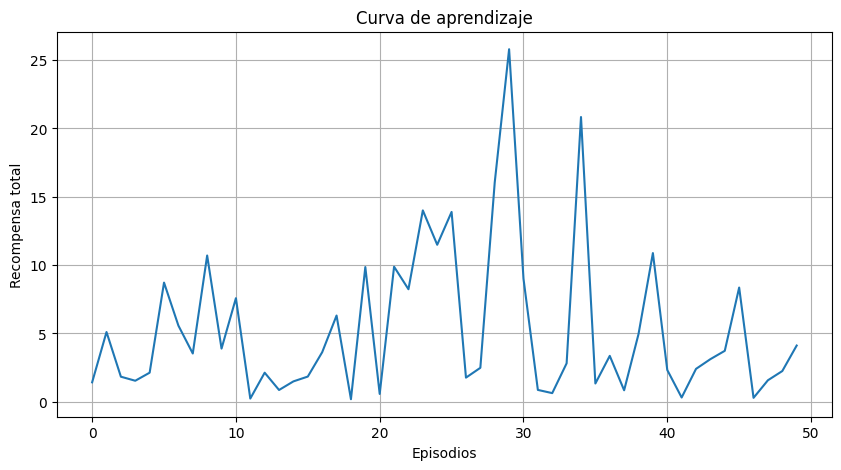

In [20]:
import time
import random
import numpy as np
from collections import deque
import matplotlib.pyplot as plt

def entrenar_agente(agente, entorno, num_episodios=500, max_pasos=1000,
                   gamma=0.99, alpha=0.1, epsilon_inicial=1.0, epsilon_final=0.01,
                   decaimiento_epsilon=0.995, intervalo_eval=10, mostrar_progreso=True):
    """
    Función completa para entrenar agentes de aprendizaje por refuerzo.

    Args:
        agente: Objeto agente con métodos seleccionar_accion y aprender
        entorno: Objeto entorno con métodos reset y paso
        num_episodios: Número de episodios de entrenamiento
        max_pasos: Número máximo de pasos por episodio
        gamma: Factor de descuento para el aprendizaje
        alpha: Tasa de aprendizaje
        epsilon_inicial: Valor inicial de epsilon para exploración
        epsilon_final: Valor mínimo de epsilon
        decaimiento_epsilon: Factor de decaimiento de epsilon
        intervalo_eval: Cada cuántos episodios evaluar sin exploración
        mostrar_progreso: Si mostrar información durante el entrenamiento

    Returns:
        dict: Diccionario con resultados del entrenamiento
    """
    # Estructuras para almacenar resultados
    todas_recompensas = []
    recompensas_evaluacion = []
    pasos_por_episodio = []
    epsilon = epsilon_inicial
    tiempo_inicio = time.time()

    # Ventana deslizante para promediar recompensas recientes
    ventana_recompensas = deque(maxlen=50)

    # Función para ejecutar un episodio de evaluación (sin exploración)
    def ejecutar_evaluacion():
        estado = entorno.reset()
        recompensa_total = 0
        terminado = False

        for paso in range(max_pasos):
            # Durante evaluación, siempre seleccionamos la mejor acción
            # Para ello, pasamos epsilon=0 si el agente lo soporta
            try:
                if hasattr(agente, "epsilon"):
                    # Guardamos epsilon original
                    epsilon_original = agente.epsilon
                    agente.epsilon = 0
                    accion = agente.seleccionar_accion(estado)
                    agente.epsilon = epsilon_original
                elif hasattr(agente, "seleccionar_mejor_accion"):
                    # Si el agente tiene método específico para seleccionar mejor acción
                    accion = agente.seleccionar_mejor_accion(estado)
                else:
                    # Intentamos con parámetro epsilon=0
                    accion = agente.seleccionar_accion(estado, epsilon=0)
            except:
                # Si nada funciona, usamos el método normal
                accion = agente.seleccionar_accion(estado)

            siguiente_estado, recompensa, terminado, info = entorno.paso(accion)
            estado = siguiente_estado
            recompensa_total += recompensa

            if terminado:
                break

        return recompensa_total, paso + 1

    # Bucle principal de entrenamiento
    try:
        for episodio in range(1, num_episodios + 1):
            # Reiniciamos el entorno
            estado = entorno.reset()
            recompensa_episodio = 0
            pasos_episodio = 0
            terminado = False

            # Bucle del episodio
            for paso in range(max_pasos):
                # Seleccionamos acción según la política actual (con exploración)
                try:
                    # Intentamos pasar epsilon si el agente lo soporta
                    if hasattr(agente, "epsilon"):
                        agente.epsilon = epsilon
                        accion = agente.seleccionar_accion(estado)
                    else:
                        # Intentamos con parámetro epsilon
                        accion = agente.seleccionar_accion(estado, epsilon=epsilon)
                except:
                    # Si nada funciona, usamos el método normal
                    accion = agente.seleccionar_accion(estado)

                # Ejecutamos la acción en el entorno
                siguiente_estado, recompensa, terminado, info = entorno.paso(accion)

                # El agente aprende de la experiencia
                try:
                    # Intentamos pasar todos los parámetros si el agente los soporta
                    agente.aprender(estado, accion, recompensa, siguiente_estado, alpha, gamma)
                except:
                    # Si no funciona, usamos los parámetros mínimos
                    agente.aprender(estado, accion, recompensa, siguiente_estado)

                # Actualizamos estado y contadores
                estado = siguiente_estado
                recompensa_episodio += recompensa
                pasos_episodio += 1

                if terminado:
                    break

            # Guardamos estadísticas del episodio
            todas_recompensas.append(recompensa_episodio)
            pasos_por_episodio.append(pasos_episodio)
            ventana_recompensas.append(recompensa_episodio)

            # Actualizamos épsilon con decaimiento
            epsilon = max(epsilon_final, epsilon * decaimiento_epsilon)

            # Evaluación periódica sin exploración
            if episodio % intervalo_eval == 0:
                recompensa_eval, pasos_eval = ejecutar_evaluacion()
                recompensas_evaluacion.append((episodio, recompensa_eval))

                if mostrar_progreso:
                    print(f"\rEpisodio: {episodio}/{num_episodios}, "
                          f"Recompensa: {recompensa_episodio:.1f}, "
                          f"Evaluación: {recompensa_eval:.1f}, "
                          f"Epsilon: {epsilon:.3f}", end="")

            # Mostramos progreso
            elif mostrar_progreso and (episodio % 10 == 0 or episodio == 1):
                promedio_ventana = sum(ventana_recompensas) / len(ventana_recompensas) if ventana_recompensas else 0
                print(f"\rEpisodio: {episodio}/{num_episodios}, "
                      f"Recompensa: {recompensa_episodio:.1f}, "
                      f"Promedio: {promedio_ventana:.1f}, "
                      f"Epsilon: {epsilon:.3f}", end="")

    except KeyboardInterrupt:
        print("\nEntrenamiento interrumpido por el usuario.")
    except Exception as e:
        print(f"\nError durante el entrenamiento: {e}")
        raise

    # Calculamos estadísticas finales
    tiempo_total = time.time() - tiempo_inicio
    promedio_recompensa = np.mean(todas_recompensas)
    promedio_ultimas = np.mean(list(ventana_recompensas)) if ventana_recompensas else 0

    # Resultados finales
    resultados = {
        "tiempo_total": tiempo_total,
        "num_episodios": episodio,
        "recompensas": todas_recompensas,
        "pasos": pasos_por_episodio,
        "recompensas_eval": recompensas_evaluacion,
        "epsilon_final": epsilon,
        "recompensa_mejor": max(todas_recompensas),
        "recompensa_promedio": promedio_recompensa,
        "recompensa_ultimas": promedio_ultimas
    }

    if mostrar_progreso:
        print(f"\nEntrenamiento completado en {tiempo_total:.2f} segundos")
        print(f"Episodios totales: {episodio}")
        print(f"Recompensa promedio: {promedio_recompensa:.2f}")
        print(f"Recompensa últimos 50 episodios: {promedio_ultimas:.2f}")
        print(f"Mejor recompensa: {max(todas_recompensas):.2f}")

    return resultados

# Clases para demostración
class AgenteDemo:
    def seleccionar_accion(self, estado, epsilon=0):
        """Selecciona acción aleatoria para demostración."""
        return random.randint(0, 1)

    def seleccionar_mejor_accion(self, estado):
        """Método alternativo para seleccionar la mejor acción."""
        return 0  # Siempre selecciona acción 0 para demostración

    def aprender(self, estado, accion, recompensa, sig_estado, alpha=0.1, gamma=0.9):
        """Simula aprendizaje para demostración."""
        pass

class EntornoDemo:
    def reset(self):
        """Reinicia el entorno a estado inicial."""
        return [0, 0]

    def paso(self, accion):
        """Ejecuta acción y retorna resultado."""
        recompensa = random.random()
        sig_estado = [random.random(), random.random()]
        terminado = random.random() < 0.1
        info = {}
        return sig_estado, recompensa, terminado, info

# Ejecutamos entrenamiento de demostración
agente_demo = AgenteDemo()
entorno_demo = EntornoDemo()

# Parámetros simplificados para la demo
resultados = entrenar_agente(
    agente_demo,
    entorno_demo,
    num_episodios=50,  # Número reducido para demostración
    max_pasos=50,      # Pasos reducidos para demostración
    intervalo_eval=10,
    mostrar_progreso=True
)

# Visualizamos resultados
plt.figure(figsize=(10, 5))
plt.plot(resultados["recompensas"])
plt.xlabel("Episodios")
plt.ylabel("Recompensa total")
plt.title("Curva de aprendizaje")
plt.grid(True)
plt.show()

Explicación:
Esta función de entrenamiento integra múltiples conceptos de programación en Python, como manejo de excepciones, parámetros con valores por defecto, y estructuras de datos para seguimiento de progreso.
Características principales:

Robustez y adaptabilidad:

Se adapta a diferentes interfaces de agentes mediante bloques try-except
Intenta utilizar métodos y parámetros específicos, con fallbacks apropiados
Maneja interrupciones del usuario y errores inesperados


Gestión de hiperparámetros:

Configurable mediante numerosos parámetros con valores por defecto sensatos
Implementa decaimiento progresivo de epsilon para transición exploración-explotación


Monitoreo y evaluación:

Muestra progreso durante el entrenamiento
Realiza evaluaciones periódicas sin exploración
Mantiene una ventana deslizante para promediar recompensas recientes


Estructura de resultados:

Retorna un diccionario detallado con estadísticas del entrenamiento
Incluye recompensas, pasos, tiempos y métricas de desempeño



La función es un ejemplo de buenas prácticas en Python, combinando flexibilidad, robustez y claridad. El manejo de excepciones permite que la función se adapte a diferentes implementaciones de agentes, mientras que los valores por defecto proporcionan una configuración sensata para principiantes, pero permiten ajustes para usuarios avanzados.
Esta función central en cualquier sistema de aprendizaje por refuerzo podría utilizarse para entrenar una amplia variedad de agentes en diversos entornos.

Ejercicio 20: Sistema Completo de Agentes y Entornos

Iniciando entrenamiento...
Entorno: GridWorld 7x7
Agente: QLearningAgent(states=0, α=0.1, γ=0.95, exp=EpsilonGreedy(ε=1.000, min=0.1, decay=0.990))
Episode: 50/300, Reward: 1.3, Eval: 8.9, Steps: 88
Episode: 100/300, Reward: -10.9, Eval: 8.9, Steps: 100
Episode: 150/300, Reward: -10.9, Eval: 8.9, Steps: 100
Episode: 200/300, Reward: -10.9, Eval: 8.9, Steps: 100
Episode: 250/300, Reward: -10.9, Eval: 8.9, Steps: 100
Episode: 300/300, Reward: 6.2, Eval: -10.9, Steps: 39

Entrenamiento completado!
Tiempo total: 0.08 segundos
Recompensa promedio: -7.23
Recompensa máxima: 8.40
Promedio últimos 20 episodios: -7.71


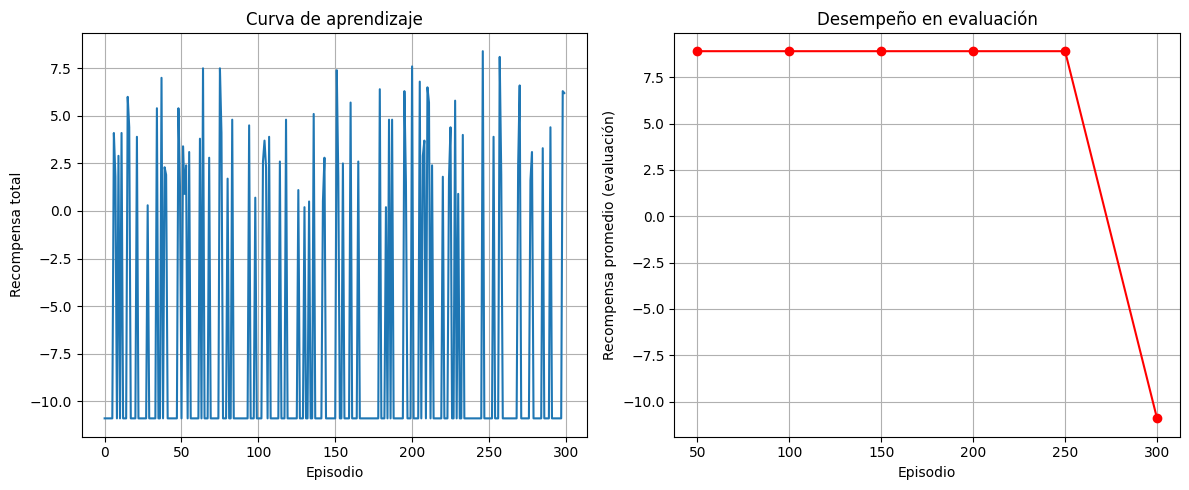


--- Demostración Final ---

Episodio de demostración 1:
Pasos: 0
A . . . . . . 
. . . . . . . 
. . . . . . . 
. . . . . . . 
. . . . . . . 
. . . . . . . 
. . . . . . T 
Pasos: 1
. . . . . . . 
A . . . . . . 
. . . . . . . 
. . . . . . . 
. . . . . . . 
. . . . . . . 
. . . . . . T 
Pasos: 2
. . . . . . . 
. . . . . . . 
A . . . . . . 
. . . . . . . 
. . . . . . . 
. . . . . . . 
. . . . . . T 
Pasos: 3
. . . . . . . 
. . . . . . . 
. . . . . . . 
A . . . . . . 
. . . . . . . 
. . . . . . . 
. . . . . . T 
Pasos: 4
. . . . . . . 
. . . . . . . 
. . . . . . . 
. A . . . . . 
. . . . . . . 
. . . . . . . 
. . . . . . T 
Pasos: 5
. . . . . . . 
. . . . . . . 
. . . . . . . 
. . . . . . . 
. A . . . . . 
. . . . . . . 
. . . . . . T 
Pasos: 6
. . . . . . . 
. . . . . . . 
. . . . . . . 
. . . . . . . 
. . . . . . . 
. A . . . . . 
. . . . . . T 
Pasos: 7
. . . . . . . 
. . . . . . . 
. . . . . . . 
. . . . . . . 
. . . . . . . 
. . A . . . . 
. . . . . . T 
Pasos: 8
. . . . . . . 
. . . .

In [21]:
import random
import time
import numpy as np
import matplotlib.pyplot as plt
from abc import ABC, abstractmethod

# ------------- Excepciones Personalizadas -------------
class RLError(Exception):
    """Error base para el framework de RL."""
    pass

class AgentError(RLError):
    """Error relacionado con agentes."""
    pass

class EnvironmentError(RLError):
    """Error relacionado con entornos."""
    pass

class PolicyError(RLError):
    """Error relacionado con políticas."""
    pass

class TrainingError(RLError):
    """Error relacionado con entrenamiento."""
    pass

# ------------- Estrategias de Exploración (Patrón Strategy) -------------
class ExplorationStrategy(ABC):
    @abstractmethod
    def select_action(self, state, q_values):
        """Selecciona acción según la estrategia."""
        pass

    @abstractmethod
    def update(self, **kwargs):
        """Actualiza parámetros de la estrategia."""
        pass

class EpsilonGreedy(ExplorationStrategy):
    def __init__(self, epsilon=0.1, decay=0.995, epsilon_min=0.01):
        self.epsilon = epsilon
        self.decay = decay
        self.epsilon_min = epsilon_min

    def select_action(self, state, q_values):
        """
        Selecciona acción usando la política epsilon-greedy.

        Args:
            state: Estado actual (no usado directamente)
            q_values: Valores Q para cada acción

        Returns:
            int: Índice de la acción seleccionada
        """
        # Exploración: acción aleatoria con probabilidad epsilon
        if random.random() < self.epsilon:
            return random.randint(0, len(q_values) - 1)

        # Explotación: mejor acción conocida
        # En caso de empate, elige aleatoriamente entre las mejores
        best_value = max(q_values)
        best_actions = [i for i, value in enumerate(q_values) if value == best_value]
        return random.choice(best_actions)

    def update(self, **kwargs):
        """
        Actualiza parámetros de la estrategia.

        Args:
            **kwargs: Parámetros opcionales (epsilon, decay, epsilon_min)

        Returns:
            bool: True si se actualizó correctamente
        """
        # Actualizamos parámetros si se proporcionan
        if "epsilon" in kwargs:
            self.epsilon = kwargs["epsilon"]

        if "decay" in kwargs:
            self.decay = kwargs["decay"]

        if "epsilon_min" in kwargs:
            self.epsilon_min = kwargs["epsilon_min"]

        # Aplicamos decaimiento
        apply_decay = kwargs.get("apply_decay", True)
        if apply_decay:
            self.epsilon = max(self.epsilon_min, self.epsilon * self.decay)

        return True

    def __str__(self):
        return f"EpsilonGreedy(ε={self.epsilon:.3f}, min={self.epsilon_min}, decay={self.decay:.3f})"

# ------------- Interfaces Base -------------
class Environment(ABC):
    @abstractmethod
    def reset(self):
        """Reinicia el entorno y retorna estado inicial."""
        pass

    @abstractmethod
    def step(self, action):
        """Ejecuta acción y retorna (next_state, reward, done, info)."""
        pass

    @property
    @abstractmethod
    def action_space(self):
        """Retorna el espacio de acciones."""
        pass

    @property
    @abstractmethod
    def observation_space(self):
        """Retorna el espacio de observaciones."""
        pass

class Agent(ABC):
    @abstractmethod
    def select_action(self, state):
        """Selecciona acción basada en estado actual."""
        pass

    @abstractmethod
    def learn(self, state, action, reward, next_state, done):
        """Actualiza conocimiento basado en experiencia."""
        pass

    @abstractmethod
    def save(self, path):
        """Guarda el modelo del agente."""
        pass

    @abstractmethod
    def load(self, path):
        """Carga el modelo del agente."""
        pass

# ------------- Implementaciones Concretas -------------

# GridWorld: un entorno de rejilla 2D simple
class GridWorld(Environment):
    def __init__(self, width=5, height=5, max_steps=100):
        """
        Inicializa un entorno de mundo en rejilla 2D.

        Args:
            width (int): Ancho de la rejilla
            height (int): Alto de la rejilla
            max_steps (int): Número máximo de pasos por episodio
        """
        self.width = width
        self.height = height
        self.max_steps = max_steps
        self.target_position = (height - 1, width - 1)  # Esquina inferior derecha
        self.agent_position = None
        self.steps = 0
        self._action_space = 4  # Arriba, Derecha, Abajo, Izquierda
        self._observation_space = width * height

    def reset(self):
        """
        Reinicia el entorno y retorna el estado inicial.

        Returns:
            int: Estado inicial (índice lineal)
        """
        self.agent_position = (0, 0)  # Esquina superior izquierda
        self.steps = 0
        return self._get_state()

    def step(self, action):
        """
        Ejecuta una acción y retorna el resultado.

        Args:
            action (int): Acción a ejecutar (0: arriba, 1: derecha, 2: abajo, 3: izquierda)

        Returns:
            tuple: (next_state, reward, done, info)
        """
        # Validar acción
        if not 0 <= action < 4:
            raise EnvironmentError(f"Acción inválida: {action}. Debe estar entre 0 y 3")

        # Incrementamos contador de pasos
        self.steps += 1

        # Posición actual
        row, col = self.agent_position

        # Ejecutamos acción
        if action == 0:  # Arriba
            row = max(0, row - 1)
        elif action == 1:  # Derecha
            col = min(self.width - 1, col + 1)
        elif action == 2:  # Abajo
            row = min(self.height - 1, row + 1)
        elif action == 3:  # Izquierda
            col = max(0, col - 1)

        # Actualizamos posición
        self.agent_position = (row, col)

        # Verificamos si llegamos al objetivo
        done = self.agent_position == self.target_position

        # Recompensa: positiva si llegamos al objetivo, pequeña penalización por paso
        if done:
            reward = 10.0  # Éxito
        else:
            reward = -0.1  # Pequeña penalización por cada paso

        # Información adicional
        info = {
            "position": self.agent_position,
            "steps": self.steps,
            "distance": abs(row - self.target_position[0]) + abs(col - self.target_position[1])  # Distancia Manhattan
        }

        # Estado final si se alcanza el límite de pasos
        if self.steps >= self.max_steps:
            done = True
            reward = -1.0  # Penalización adicional por timeout

        return self._get_state(), reward, done, info

    @property
    def action_space(self):
        """Retorna el número de acciones posibles."""
        return self._action_space

    @property
    def observation_space(self):
        """Retorna el número de estados posibles."""
        return self._observation_space

    def _get_state(self):
        """
        Convierte posición 2D a un índice de estado.

        Returns:
            int: Índice lineal del estado
        """
        row, col = self.agent_position
        return row * self.width + col

    def render(self):
        """
        Visualiza el entorno en consola.

        Returns:
            str: Representación visual del entorno
        """
        grid = []
        for row in range(self.height):
            row_str = ""
            for col in range(self.width):
                if (row, col) == self.agent_position:
                    row_str += "A "  # Agente
                elif (row, col) == self.target_position:
                    row_str += "T "  # Objetivo
                else:
                    row_str += ". "  # Celda vacía
            grid.append(row_str)

        grid_str = "\n".join(grid)
        print(f"Pasos: {self.steps}")
        print(grid_str)
        return grid_str

# QLearningAgent: agente que implementa el algoritmo Q-Learning
class QLearningAgent(Agent):
    def __init__(self, action_space, observation_space, **kwargs):
        """
        Inicializa un agente Q-Learning.

        Args:
            action_space (int): Número de acciones posibles
            observation_space (int): Número de estados posibles
            **kwargs: Parámetros opcionales (alpha, gamma, exploration)
        """
        self.action_space = action_space
        self.observation_space = observation_space
        self.q_table = {}  # Tabla Q: {state: [q_values para cada acción]}

        # Hiperparámetros
        self.alpha = kwargs.get('alpha', 0.1)  # Tasa de aprendizaje
        self.gamma = kwargs.get('gamma', 0.99)  # Factor de descuento

        # Estrategia de exploración (patrón Strategy)
        self.exploration = kwargs.get('exploration',
                                     EpsilonGreedy(epsilon=kwargs.get('epsilon', 0.1)))

        # Contador para seguimiento
        self.learn_count = 0

    def select_action(self, state):
        """
        Selecciona una acción usando la estrategia de exploración.

        Args:
            state: Estado actual

        Returns:
            int: Acción seleccionada
        """
        # Convertimos estado a string para usar como clave
        state_str = str(state)

        # Inicializamos valores si no existen
        if state_str not in self.q_table:
            self.q_table[state_str] = [0.0] * self.action_space

        # Delegamos selección a la estrategia
        return self.exploration.select_action(state, self.q_table[state_str])

    def select_best_action(self, state):
        """
        Selecciona la mejor acción conocida (sin exploración).

        Args:
            state: Estado actual

        Returns:
            int: Mejor acción
        """
        # Convertimos estado a string para usar como clave
        state_str = str(state)

        # Inicializamos valores si no existen
        if state_str not in self.q_table:
            self.q_table[state_str] = [0.0] * self.action_space

        # Seleccionamos la acción con mayor valor Q
        q_values = self.q_table[state_str]

        # En caso de empate, seleccionamos aleatoriamente entre las mejores
        best_value = max(q_values)
        best_actions = [i for i, value in enumerate(q_values) if value == best_value]
        return random.choice(best_actions)

    def learn(self, state, action, reward, next_state, done):
        """
        Actualiza la tabla Q según el algoritmo Q-Learning.

        Args:
            state: Estado actual
            action: Acción tomada
            reward: Recompensa obtenida
            next_state: Estado siguiente
            done: Si el episodio ha terminado

        Returns:
            float: Nuevo valor Q
        """
        # Convertimos estados a strings para usar como claves
        state_str = str(state)
        next_state_str = str(next_state)

        # Inicializamos valores si no existen
        if state_str not in self.q_table:
            self.q_table[state_str] = [0.0] * self.action_space
        if next_state_str not in self.q_table:
            self.q_table[next_state_str] = [0.0] * self.action_space

        # Valor Q actual
        current_q = self.q_table[state_str][action]

        # Si es estado terminal, el valor futuro es 0
        if done:
            max_future_q = 0
        else:
            # Máximo valor Q del siguiente estado
            max_future_q = max(self.q_table[next_state_str])

        # Fórmula Q-Learning: Q(s,a) = Q(s,a) + α[r + γ·max(Q(s',a')) - Q(s,a)]
        new_q = current_q + self.alpha * (reward + self.gamma * max_future_q - current_q)

        # Actualizamos la tabla Q
        self.q_table[state_str][action] = new_q

        # Incrementamos contador
        self.learn_count += 1

        return new_q

    def save(self, path):
        """
        Guarda la tabla Q en un archivo.

        Args:
            path (str): Ruta del archivo

        Returns:
            bool: True si se guardó correctamente
        """
        import pickle
        try:
            with open(path, 'wb') as f:
                pickle.dump({
                    'q_table': self.q_table,
                    'alpha': self.alpha,
                    'gamma': self.gamma,
                    'learn_count': self.learn_count
                }, f)
            return True
        except Exception as e:
            print(f"Error al guardar: {e}")
            return False

    def load(self, path):
        """
        Carga la tabla Q desde un archivo.

        Args:
            path (str): Ruta del archivo

        Returns:
            bool: True si se cargó correctamente
        """
        import pickle
        try:
            with open(path, 'rb') as f:
                data = pickle.load(f)
                self.q_table = data['q_table']
                self.alpha = data.get('alpha', self.alpha)
                self.gamma = data.get('gamma', self.gamma)
                self.learn_count = data.get('learn_count', 0)
            return True
        except Exception as e:
            print(f"Error al cargar: {e}")
            return False

    def __str__(self):
        return f"QLearningAgent(states={len(self.q_table)}, α={self.alpha}, γ={self.gamma}, exp={self.exploration})"

# ------------- Funciones de Entrenamiento -------------
def train_agent(agent, env, episodes=1000, max_steps=100,
               verbose=True, eval_interval=100):
    """
    Entrena un agente en un entorno.

    Args:
        agent: Instancia de Agent
        env: Instancia de Environment
        episodes: Número de episodios
        max_steps: Pasos máximos por episodio
        verbose: Si mostrar progreso
        eval_interval: Intervalo para evaluación sin exploración

    Returns:
        dict: Resultados del entrenamiento
    """
    # Verificaciones iniciales
    if not hasattr(agent, 'select_action') or not hasattr(agent, 'learn'):
        raise AgentError("El agente debe implementar select_action y learn")

    if not hasattr(env, 'reset') or not hasattr(env, 'step'):
        raise EnvironmentError("El entorno debe implementar reset y step")

    # Estructuras para almacenar resultados
    rewards = []
    steps_per_episode = []
    eval_rewards = []
    start_time = time.time()

    # Bucle principal de entrenamiento
    try:
        for episode in range(1, episodes + 1):
            # Reiniciamos el entorno
            state = env.reset()
            episode_reward = 0
            episode_steps = 0

            # Bucle del episodio
            for step in range(max_steps):
                # Seleccionamos acción
                action = agent.select_action(state)

                # Ejecutamos acción en el entorno
                next_state, reward, done, info = env.step(action)

                # El agente aprende de la experiencia
                agent.learn(state, action, reward, next_state, done)

                # Actualizamos estado y contadores
                state = next_state
                episode_reward += reward
                episode_steps += 1

                # Terminamos si el episodio ha terminado
                if done:
                    break

            # Guardamos estadísticas
            rewards.append(episode_reward)
            steps_per_episode.append(episode_steps)

            # Evaluamos periódicamente sin exploración
            if episode % eval_interval == 0:
                eval_reward = evaluate_agent(agent, env, episodes=3, max_steps=max_steps)
                eval_rewards.append((episode, eval_reward))

                if verbose:
                    print(f"\rEpisode: {episode}/{episodes}, "
                          f"Reward: {episode_reward:.1f}, "
                          f"Eval: {eval_reward:.1f}, "
                          f"Steps: {episode_steps}")

            # Mostramos progreso
            elif verbose and episode % 10 == 0:
                print(f"\rEpisode: {episode}/{episodes}, "
                      f"Reward: {episode_reward:.1f}, "
                      f"Steps: {episode_steps}", end="")

    except KeyboardInterrupt:
        print("\nTraining interrupted by user")
    except Exception as e:
        print(f"\nError during training: {e}")
        raise

    # Calculamos estadísticas finales
    total_time = time.time() - start_time

    # Resultados
    results = {
        'rewards': rewards,
        'steps': steps_per_episode,
        'eval_rewards': eval_rewards,
        'total_time': total_time,
        'avg_reward': sum(rewards) / len(rewards) if rewards else 0,
        'max_reward': max(rewards) if rewards else 0,
        'last_20_avg': sum(rewards[-20:]) / min(20, len(rewards)) if rewards else 0
    }

    return results

def evaluate_agent(agent, env, episodes=10, max_steps=100):
    """
    Evalúa un agente sin exploración.

    Args:
        agent: Instancia de Agent
        env: Instancia de Environment
        episodes: Número de episodios
        max_steps: Pasos máximos por episodio

    Returns:
        float: Recompensa promedio
    """
    # Verificaciones iniciales
    if not hasattr(agent, 'select_action') or not callable(agent.select_action):
        raise AgentError("El agente debe tener un método select_action")

    total_rewards = []

    # Intentamos usar método específico para mejor acción si existe
    use_best_action = hasattr(agent, 'select_best_action') and callable(agent.select_best_action)

    # Bucle de evaluación
    for _ in range(episodes):
        state = env.reset()
        episode_reward = 0

        for step in range(max_steps):
            # Seleccionamos la mejor acción (sin exploración)
            if use_best_action:
                action = agent.select_best_action(state)
            else:
                # Intentamos usar el método normal
                action = agent.select_action(state)

            # Ejecutamos acción
            next_state, reward, done, _ = env.step(action)

            # Actualizamos estado y recompensa
            state = next_state
            episode_reward += reward

            if done:
                break

        total_rewards.append(episode_reward)

    # Retornamos recompensa promedio
    return sum(total_rewards) / len(total_rewards) if total_rewards else 0

# ------------- Demostración Principal -------------
def main():
    """Función principal para demostrar el sistema completo."""
    # Creamos entorno y agente
    env = GridWorld(width=7, height=7)

    # Estrategia de exploración
    exploration = EpsilonGreedy(epsilon=1.0, decay=0.99, epsilon_min=0.1)

    # Agente
    agent = QLearningAgent(
        action_space=env.action_space,
        observation_space=env.observation_space,
        alpha=0.1,
        gamma=0.95,
        exploration=exploration
    )

    print("Iniciando entrenamiento...")
    print(f"Entorno: GridWorld {env.height}x{env.width}")
    print(f"Agente: {agent}")

    # Entrenamiento
    results = train_agent(
        agent,
        env,
        episodes=300,
        max_steps=200,
        eval_interval=50
    )

    print("\nEntrenamiento completado!")
    print(f"Tiempo total: {results['total_time']:.2f} segundos")
    print(f"Recompensa promedio: {results['avg_reward']:.2f}")
    print(f"Recompensa máxima: {results['max_reward']:.2f}")
    print(f"Promedio últimos 20 episodios: {results['last_20_avg']:.2f}")

    # Visualización de resultados
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(results['rewards'])
    plt.xlabel('Episodio')
    plt.ylabel('Recompensa total')
    plt.title('Curva de aprendizaje')
    plt.grid(True)

    plt.subplot(1, 2, 2)
    episodes, eval_rewards = zip(*results['eval_rewards'])
    plt.plot(episodes, eval_rewards, 'r-o')
    plt.xlabel('Episodio')
    plt.ylabel('Recompensa promedio (evaluación)')
    plt.title('Desempeño en evaluación')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    # Demostración final
    print("\n--- Demostración Final ---")
    for episode in range(3):
        print(f"\nEpisodio de demostración {episode+1}:")
        state = env.reset()
        env.render()

        total_reward = 0
        done = False

        while not done:
            # Usamos la mejor acción (sin exploración)
            action = agent.select_best_action(state)
            next_state, reward, done, info = env.step(action)
            total_reward += reward

            state = next_state
            env.render()
            time.sleep(0.5)  # Pausa para visualización

        print(f"Episodio {episode+1}: Recompensa total = {total_reward:.1f}")

# Ejecución del programa principal
if __name__ == "__main__":
    try:
        main()
    except Exception as e:
        print(f"Error en la ejecución: {e}")

Explicación:
Este sistema completo integra todos los conceptos del módulo 2 en un framework coherente de aprendizaje por refuerzo:

Jerarquía de excepciones personalizadas:

Excepciones específicas para diferentes componentes del sistema
Facilita el manejo de errores y la depuración


Patrones de diseño:

Strategy para políticas de exploración intercambiables
Factory implícito en la modularidad de agentes y entornos
Template Method en las interfaces abstractas


Programación orientada a objetos:

Interfaces abstractas para agentes y entornos
Implementaciones concretas que extienden las interfaces
Encapsulación de estado y comportamiento


Programación funcional:

Funciones de orden superior para entrenamiento y evaluación
Funciones puras para procesamiento de datos


Manejo de recursos y excepciones:

Bloques try-except para robustez
Gestión adecuada de errores



El sistema se demuestra con un ejemplo completo de un agente Q-Learning en un entorno GridWorld, mostrando la curva de aprendizaje y el comportamiento final del agente entrenado.
Este ejercicio final representa una síntesis de todos los conceptos vistos en el módulo, creando un mini-framework de aprendizaje por refuerzo funcional y extensible.
La arquitectura modular permite añadir fácilmente nuevos tipos de agentes, entornos y estrategias de exploración, haciendo el sistema útil para experimentación e investigación en aprendizaje por refuerzo.
Conclusión
En estos ejercicios hemos cubierto una amplia gama de conceptos de programación en Python, con énfasis en su aplicación al aprendizaje por refuerzo:

Funciones y su versatilidad: Parámetros por defecto, args/kwargs, decoradores
Programación funcional: Lambda, map/filter/reduce, listas por comprensión
Programación orientada a objetos: Clases, herencia, polimorfismo, encapsulación
Manejo de errores: Excepciones personalizadas, bloques try-except-finally
Patrones de diseño: Singleton, Factory, Strategy

Estos conceptos son fundamentales para desarrollar sistemas de aprendizaje por refuerzo robustos y eficientes. La combinación de paradigmas funcionales y orientados a objetos permite crear código que es a la vez flexible y mantenible.
Al dominar estas técnicas, estás preparado para implementar algoritmos de aprendizaje por refuerzo más avanzados y aplicarlos a problemas complejos del mundo real. Las habilidades de programación adquiridas te servirán tanto en este campo como en muchos otros ámbitos de la ciencia de datos y el desarrollo de software.

In [23]:
#FIN